In [ ]:
# ========================================================================
# VISUALIZACIONES ALTERNATIVAS DE VARIABLES NUMÉRICAS
# Exploración de combinaciones interesantes para mejor insight
# ========================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print("\n" + "="*80)
print("🔍 EXPLORACIÓN VISUAL: COMBINACIONES ALTERNATIVAS DE VARIABLES")
print("="*80)

if 'df' not in globals():
    raise RuntimeError("El DataFrame `df` no está cargado. Ejecuta la celda de carga antes de esta.")

# Obtener variables numéricas
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n📊 Variables numéricas disponibles: {variables_numericas}")

# Crear figura con múltiples combinaciones interesantes
fig = plt.figure(figsize=(20, 14))

# 1️⃣ EDAD vs CD4 coloreado por CLASE y tamaño por Carga Viral
print("\n1️⃣ Edad vs CD4 (coloreado por clase, tamaño por carga viral)")
ax1 = plt.subplot(3, 3, 1)
if all(col in df.columns for col in ['Edad', 'CD4', 'Carga_Viral_Log', 'Clase']):
    for clase in df['Clase'].unique():
        mask = df['Clase'] == clase
        color = '#2ecc71' if clase == 'Sano' else '#e74c3c'
        sizes = 50 + (df.loc[mask, 'Carga_Viral_Log'] * 20)
        ax1.scatter(df.loc[mask, 'Edad'], df.loc[mask, 'CD4'], 
                   s=sizes, alpha=0.6, color=color, label=clase, 
                   edgecolors='black', linewidth=0.7)
    ax1.set_xlabel('Edad (años)', fontweight='bold')
    ax1.set_ylabel('CD4 (células/mm³)', fontweight='bold')
    ax1.set_title('Edad vs CD4\n(color=Clase, tamaño=Carga Viral)', fontweight='bold', fontsize=11)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

# 2️⃣ CD4 vs Carga Viral con densidad
print("2️⃣ CD4 vs Carga Viral (con estimación de densidad)")
ax2 = plt.subplot(3, 3, 2)
if all(col in df.columns for col in ['CD4', 'Carga_Viral_Log']):
    from scipy.stats import gaussian_kde
    x = df['Carga_Viral_Log'].dropna().values
    y = df['CD4'].dropna().values
    
    # Calcular densidad
    if len(x) > 0 and len(y) > 0:
        xy = np.vstack([x, y])
        z = gaussian_kde(xy)(xy)
        scatter = ax2.scatter(x, y, c=z, s=70, cmap='turbo', alpha=0.7, edgecolors='black', linewidth=0.5)
        plt.colorbar(scatter, ax=ax2, label='Densidad')
    
    ax2.set_xlabel('Carga Viral Log', fontweight='bold')
    ax2.set_ylabel('CD4 (células/mm³)', fontweight='bold')
    ax2.set_title('CD4 vs Carga Viral\n(densidad de puntos)', fontweight='bold', fontsize=11)
    ax2.grid(True, alpha=0.3)

# 3️⃣ Carga Viral vs Edad
print("3️⃣ Carga Viral vs Edad (coloreado por CD4)")
ax3 = plt.subplot(3, 3, 3)
if all(col in df.columns for col in ['Carga_Viral_Log', 'Edad', 'CD4']):
    scatter3 = ax3.scatter(df['Edad'], df['Carga_Viral_Log'], 
                          c=df['CD4'], s=80, cmap='RdYlGn_r', alpha=0.7, 
                          edgecolors='black', linewidth=0.5)
    cbar3 = plt.colorbar(scatter3, ax=ax3, label='CD4')
    ax3.set_xlabel('Edad (años)', fontweight='bold')
    ax3.set_ylabel('Carga Viral Log', fontweight='bold')
    ax3.set_title('Edad vs Carga Viral\n(color=CD4)', fontweight='bold', fontsize=11)
    ax3.grid(True, alpha=0.3)

# 4️⃣ Box plot: CD4 por CLASE y SEXO
print("4️⃣ CD4 agrupado por Clase y Sexo")
ax4 = plt.subplot(3, 3, 4)
if all(col in df.columns for col in ['CD4', 'Clase', 'Sexo']):
    df_plot = df[['CD4', 'Clase', 'Sexo']].dropna()
    sns.boxplot(data=df_plot, x='Clase', y='CD4', hue='Sexo', ax=ax4, 
               palette=['#3498db', '#e91e63'])
    ax4.set_title('CD4 por Clase y Sexo\n(box plot)', fontweight='bold', fontsize=11)
    ax4.set_ylabel('CD4 (células/mm³)', fontweight='bold')

# 5️⃣ Violin plot: Carga Viral por CLASE
print("5️⃣ Carga Viral por Clase (violin plot)")
ax5 = plt.subplot(3, 3, 5)
if all(col in df.columns for col in ['Carga_Viral_Log', 'Clase']):
    sns.violinplot(data=df, x='Clase', y='Carga_Viral_Log', ax=ax5,
                  palette=['#2ecc71', '#e74c3c'], inner='quartile')
    ax5.set_title('Distribución Carga Viral Log\npor Clase', fontweight='bold', fontsize=11)
    ax5.set_ylabel('Carga Viral Log', fontweight='bold')

# 6️⃣ Heatmap de promedios: CD4 por EDAD y CLASE
print("6️⃣ Heatmap: CD4 promedio por Edad bins y Clase")
ax6 = plt.subplot(3, 3, 6)
if all(col in df.columns for col in ['CD4', 'Edad', 'Clase']):
    df['Edad_Bin'] = pd.cut(df['Edad'], bins=6)
    pivot_table = df.pivot_table(values='CD4', index='Edad_Bin', columns='Clase', aggfunc='mean')
    sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='RdYlGn', ax=ax6, cbar_kws={'label': 'CD4 promedio'})
    ax6.set_title('CD4 promedio\npor Edad y Clase', fontweight='bold', fontsize=11)
    df = df.drop('Edad_Bin', axis=1)  # Limpiar

# 7️⃣ Hexbin: densidad 2D de CD4 vs Carga Viral
print("7️⃣ Hexbin: Densidad 2D de CD4 vs Carga Viral")
ax7 = plt.subplot(3, 3, 7)
if all(col in df.columns for col in ['CD4', 'Carga_Viral_Log']):
    hexbin = ax7.hexbin(df['Carga_Viral_Log'].dropna(), df['CD4'].dropna(), 
                       gridsize=12, cmap='YlOrRd', mincnt=1, edgecolors='black', linewidths=0.2)
    plt.colorbar(hexbin, ax=ax7, label='Conteo')
    ax7.set_xlabel('Carga Viral Log', fontweight='bold')
    ax7.set_ylabel('CD4 (células/mm³)', fontweight='bold')
    ax7.set_title('Densidad 2D: CD4 vs Carga\n(hexbin)', fontweight='bold', fontsize=11)

# 8️⃣ Scatter matríz resumida
print("8️⃣ Correlación visual mediante tamaño de puntos")
ax8 = plt.subplot(3, 3, 8)
if 'CD4' in df.columns and 'Edad' in df.columns:
    # Normalizar Carga Viral para tamaño
    if 'Carga_Viral_Log' in df.columns:
        sizes_norm = 30 + 120 * (df['Carga_Viral_Log'] - df['Carga_Viral_Log'].min()) / (df['Carga_Viral_Log'].max() - df['Carga_Viral_Log'].min())
    else:
        sizes_norm = 80
    
    scatter8 = ax8.scatter(df['Edad'], df['CD4'], s=sizes_norm, alpha=0.5, 
                          c=range(len(df)), cmap='viridis', edgecolors='black', linewidth=0.3)
    ax8.set_xlabel('Edad (años)', fontweight='bold')
    ax8.set_ylabel('CD4 (células/mm³)', fontweight='bold')
    ax8.set_title('Edad vs CD4\n(tamaño=Carga Viral)', fontweight='bold', fontsize=11)
    ax8.grid(True, alpha=0.3)

# 9️⃣ Bar plot: variables promedio por CLASE
print("9️⃣ Comparativa de promedios por Clase")
ax9 = plt.subplot(3, 3, 9)
if 'Clase' in df.columns:
    medias = df.groupby('Clase')[variables_numericas].mean()
    # Normalizar para visualizar en misma escala
    medias_norm = (medias - medias.min()) / (medias.max() - medias.min())
    medias_norm.iloc[:5].T.plot(kind='bar', ax=ax9, color=['#2ecc71', '#e74c3c'], width=0.7)
    ax9.set_title('Promedios normalizados\npor Clase (primeras 5 vars)', fontweight='bold', fontsize=11)
    ax9.set_ylabel('Valor normalizado', fontweight='bold')
    ax9.tick_params(axis='x', rotation=45)
    ax9.legend(title='Clase')

plt.suptitle('🎨 EXPLORACIÓN VISUAL: MÚLTIPLES PERSPECTIVAS DE LAS VARIABLES', 
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("📌 RESUMEN DE VISUALIZACIONES ALTERNATIVAS")
print("="*80)
print("""
✅ Gráficos incluidos:
   1. Scatter multidimensional: Edad-CD4 con carga viral como tamaño
   2. Densidad 2D: detección de clusters en CD4 vs Carga Viral
   3. Mapa de color: Edad-Carga Viral coloreado por CD4
   4. Box plot comparativo: CD4 por clase y sexo
   5. Violin plot: distribución completa de Carga Viral por clase
   6. Heatmap: promedios de CD4 en matriz edad-clase
   7. Hexbin: densidad concentrada en áreas de interés
   8. Scatter temporal: evolución visual con código de colores
   9. Barplot: comparación de promedios normalizados

💡 CUÁNDO USAR CADA GRÁFICO:
   • Scatter: relaciones bivariadas simples
   • Hexbin: datos muy densos o muchos solapamientos
   • Box/Violin: distribuciones por grupos
   • Heatmap: patrones en matrices tridimensionales
   • Tamaño/Color variables: agregar dimensiones extra sin más ejes
""")

print("\n" + "="*80)
print("✅ ANÁLISIS DE VISUALIZACIONES ALTERNATIVAS COMPLETADO")
print("="*80)


In [2]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import numpy as np
import os

# Paso 2: Configurar opciones de visualización de pandas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)  # Ancho máximo
pd.set_option('display.max_colwidth', 30)  # Ancho de cada columna (ajusta según necesites)
pd.set_option('display.float_format', '{:.4f}'.format)  # Formato para números decimales

# Paso 3: Leer el archivo CSV desde la carpeta local del proyecto
ruta_archivo = 'Dataset_VIH_vs_Sano_v3.csv'

try:
    # Cargar el dataset
    df = pd.read_csv(ruta_archivo)
    
    print("="*80)
    print("✅ ARCHIVO CARGADO EXITOSAMENTE")
    print("="*80)
    
    # Información básica del dataset
    print(f"\n📊 INFORMACIÓN GENERAL:")
    print(f"   • Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    print(f"   • Total de datos: {df.size} celdas")
    print(f"   • Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Vista previa de los datos
    print(f"\n👁️ VISTA PREVIA (primeras 10 filas):")
    print("="*80)
    print(df.head(10).to_string())
    
    print(f"\n👁️ ÚLTIMAS 5 FILAS:")
    print("="*80)
    print(df.tail(5).to_string())
    
    # Información de columnas
    print(f"\n📋 INFORMACIÓN DE COLUMNAS:")
    print("="*80)
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col:30s} | Tipo: {str(df[col].dtype):10s} | No nulos: {df[col].count():6d} | Únicos: {df[col].nunique():4d}")
    
    # Estadísticas descriptivas
    print(f"\n📈 ESTADÍSTICAS DESCRIPTIVAS (columnas numéricas):")
    print("="*80)
    print(df.describe().round(4).to_string())
    
    # Información de valores nulos
    print(f"\n🔍 VALORES NULOS POR COLUMNA:")
    print("="*80)
    nulos = df.isnull().sum()
    if nulos.sum() > 0:
        nulos_df = pd.DataFrame({
            'Columna': nulos.index,
            'Valores Nulos': nulos.values,
            'Porcentaje': (nulos.values / len(df) * 100).round(2)
        })
        nulos_df = nulos_df[nulos_df['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)
        print(nulos_df.to_string(index=False))
    else:
        print("No hay valores nulos en el dataset")
    
    # Distribución de la variable objetivo (si existe 'VIH' o similar)
    posibles_objetivos = ['VIH', 'target', 'clase', 'grupo', 'diagnostico', 'enfermedad']
    for col in df.columns:
        if any(palabra in col.lower() for palabra in posibles_objetivos):
            print(f"\n🎯 DISTRIBUCIÓN DE VARIABLE OBJETIVO '{col}':")
            print("="*80)
            print(df[col].value_counts().to_string())
            print(f"\nPorcentajes:")
            print((df[col].value_counts(normalize=True) * 100).round(2).to_string())
            break
    
    # Si quieres ver el dataset completo (solo si es pequeño)
    if df.shape[0] < 100:
        print(f"\n📄 DATASET COMPLETO ({df.shape[0]} filas):")
        print("="*80)
        print(df.to_string())
    else:
        print(f"\n💡 El dataset tiene {df.shape[0]} filas. Para verlo completo:")
        print("   • Usa 'print(df.to_string())' - NO RECOMENDADO (puede colapsar)")
        print("   • Guarda en CSV: df.to_csv('dataset_completo.csv')")
        print("   • Usa el explorador de variables de VS Code")
    
except FileNotFoundError:
    print(f"\n❌ Error: No se encontró el archivo en {ruta_archivo}")
    # Verificar qué hay en la carpeta actual
    if os.path.exists(ruta_archivo):
        print(f"\nArchivo encontrado en: {os.path.abspath(ruta_archivo)}")
    else:
        print("\nArchivos CSV encontrados en la carpeta actual:")
        archivos_csv = [f for f in os.listdir('.') if f.endswith('.csv')]
        if archivos_csv:
            for i, archivo in enumerate(archivos_csv, 1):
                print(f"  {i}. {archivo}")
        else:
            print("  No se encontraron archivos CSV en la carpeta actual")
    
    print(f"\nDirectorio actual: {os.getcwd()}")

except Exception as e:
    print(f"\n❌ Ocurrió un error inesperado: {e}")
    import traceback
    traceback.print_exc()

print("\n" + "="*80)
print("✅ ANÁLISIS COMPLETADO")
print("="*80)

✅ ARCHIVO CARGADO EXITOSAMENTE

📊 INFORMACIÓN GENERAL:
   • Dimensiones: 120 filas × 10 columnas
   • Total de datos: 1200 celdas
   • Memoria utilizada: 0.04 MB

👁️ VISTA PREVIA (primeras 10 filas):
     Sexo Adherencia_Tratamiento Tipo_Tratamiento  Edad  Carga_Viral_Log  Carga_Viral_Ajustada   CD4 Nivel_Riesgo_Conductual      Ocupacion Clase
0  Hombre                   Alta            ARV_B    41           5.1200                5.2674  1040                Muy Bajo     Estudiante   VIH
1   Mujer                  Media            ARV_B    69           5.1200                5.4757   718                Muy Alto  Independiente   VIH
2  Hombre                   Baja            ARV_B    28           5.1200                5.4043   258                    Bajo     Estudiante   VIH
3  Hombre                   Alta            ARV_A    66           9.1200                9.4254  1084                Muy Bajo     Estudiante   VIH
4  Hombre                  Media            ARV_B    25           5.19

Leyendo DataSet

Matplotlib is building the font cache; this may take a moment.


Matplotlib is building the font cache; this may take a moment.


🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET

📊 1. TIPOS DE DATOS POR COLUMNA
------------------------------------------------------------


,Columna,Tipo de Dato,Tipo_Detallado,Valores_Unicos,Ejemplo
0,Sexo,object,str,2,Hombre
1,Adherencia_Tratamiento,object,str,3,Alta
2,Tipo_Tratamiento,object,str,2,ARV_B
3,Edad,int64,int,52,41
4,Carga_Viral_Log,float64,float,105,5.1200
5,Carga_Viral_Ajustada,float64,float,120,5.2674
6,CD4,int64,int,110,1040
7,Nivel_Riesgo_Conductual,object,str,5,Muy Bajo
8,Ocupacion,object,str,5,Estudiante
9,Clase,object,str,2,VIH


Matplotlib is building the font cache; this may take a moment.


🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET

📊 1. TIPOS DE DATOS POR COLUMNA
------------------------------------------------------------


,Columna,Tipo de Dato,Tipo_Detallado,Valores_Unicos,Ejemplo
0,Sexo,object,str,2,Hombre
1,Adherencia_Tratamiento,object,str,3,Alta
2,Tipo_Tratamiento,object,str,2,ARV_B
3,Edad,int64,int,52,41
4,Carga_Viral_Log,float64,float,105,5.1200
5,Carga_Viral_Ajustada,float64,float,120,5.2674
6,CD4,int64,int,110,1040
7,Nivel_Riesgo_Conductual,object,str,5,Muy Bajo
8,Ocupacion,object,str,5,Estudiante
9,Clase,object,str,2,VIH



📊 RESUMEN DE TIPOS DE DATOS:
object     6
int64      2
float64    2
Name: count, dtype: int64

📌 Columnas numéricas (4): ['Edad', 'Carga_Viral_Log', 'Carga_Viral_Ajustada', 'CD4']
📌 Columnas categóricas (6): ['Sexo', 'Adherencia_Tratamiento', 'Tipo_Tratamiento', 'Nivel_Riesgo_Conductual', 'Ocupacion', 'Clase']
📌 Columnas booleanas (0): []

🔍 2. VALORES FALTANTES (NULOS)

📊 VALORES NULOS POR COLUMNA:


,Columna,Valores Nulos,Porcentaje
0,Sexo,0,0.0000
1,Adherencia_Tratamiento,0,0.0000
2,Tipo_Tratamiento,0,0.0000
3,Edad,0,0.0000
4,Carga_Viral_Log,0,0.0000
5,Carga_Viral_Ajustada,0,0.0000
6,CD4,0,0.0000
7,Nivel_Riesgo_Conductual,0,0.0000
8,Ocupacion,0,0.0000
9,Clase,0,0.0000


Matplotlib is building the font cache; this may take a moment.


🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET

📊 1. TIPOS DE DATOS POR COLUMNA
------------------------------------------------------------


,Columna,Tipo de Dato,Tipo_Detallado,Valores_Unicos,Ejemplo
0,Sexo,object,str,2,Hombre
1,Adherencia_Tratamiento,object,str,3,Alta
2,Tipo_Tratamiento,object,str,2,ARV_B
3,Edad,int64,int,52,41
4,Carga_Viral_Log,float64,float,105,5.1200
5,Carga_Viral_Ajustada,float64,float,120,5.2674
6,CD4,int64,int,110,1040
7,Nivel_Riesgo_Conductual,object,str,5,Muy Bajo
8,Ocupacion,object,str,5,Estudiante
9,Clase,object,str,2,VIH



📊 RESUMEN DE TIPOS DE DATOS:
object     6
int64      2
float64    2
Name: count, dtype: int64

📌 Columnas numéricas (4): ['Edad', 'Carga_Viral_Log', 'Carga_Viral_Ajustada', 'CD4']
📌 Columnas categóricas (6): ['Sexo', 'Adherencia_Tratamiento', 'Tipo_Tratamiento', 'Nivel_Riesgo_Conductual', 'Ocupacion', 'Clase']
📌 Columnas booleanas (0): []

🔍 2. VALORES FALTANTES (NULOS)

📊 VALORES NULOS POR COLUMNA:


,Columna,Valores Nulos,Porcentaje
0,Sexo,0,0.0000
1,Adherencia_Tratamiento,0,0.0000
2,Tipo_Tratamiento,0,0.0000
3,Edad,0,0.0000
4,Carga_Viral_Log,0,0.0000
5,Carga_Viral_Ajustada,0,0.0000
6,CD4,0,0.0000
7,Nivel_Riesgo_Conductual,0,0.0000
8,Ocupacion,0,0.0000
9,Clase,0,0.0000



📌 TOTAL DE VALORES NULOS: 0 de 1200 celdas (0.00%)
📌 COLUMNAS CON NULOS: 0 de 10 columnas

📌 FILAS CON ALGÚN VALOR NULO: 0 de 120 filas (0.00%)

🔍 3. DATOS DUPLICADOS

📊 FILAS DUPLICADAS EXACTAS: 0 de 120 filas (0.00%)

📊 FILAS CON MISMOS DATOS PERO DIFERENTE CLASE: 0 (0.00%)

📌 La columna 'Carga_Viral_Ajustada' tiene valores únicos (posible identificador)

🔍 4. ANÁLISIS DE CONSISTENCIA

📊 CONSISTENCIA ENTRE CARGAS VIRALES:
   • Registros con diferencia >10%: 120 de 120 (100.00%)

📊 VERIFICACIÓN DE RANGOS LÓGICOS:
   • Edad (0-120 años): 0 valores fuera de rango
   • CD4 (0-2000 células/mm³): 0 valores fuera de rango
   • Carga Viral Log (0-10): 0 valores fuera de rango

🔍 5. ANÁLISIS DE VARIABLES CATEGÓRICAS

📊 DISTRIBUCIÓN DE 'Sexo':
----------------------------------------


Matplotlib is building the font cache; this may take a moment.


🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET

📊 1. TIPOS DE DATOS POR COLUMNA
------------------------------------------------------------


,Columna,Tipo de Dato,Tipo_Detallado,Valores_Unicos,Ejemplo
0,Sexo,object,str,2,Hombre
1,Adherencia_Tratamiento,object,str,3,Alta
2,Tipo_Tratamiento,object,str,2,ARV_B
3,Edad,int64,int,52,41
4,Carga_Viral_Log,float64,float,105,5.1200
5,Carga_Viral_Ajustada,float64,float,120,5.2674
6,CD4,int64,int,110,1040
7,Nivel_Riesgo_Conductual,object,str,5,Muy Bajo
8,Ocupacion,object,str,5,Estudiante
9,Clase,object,str,2,VIH



📊 RESUMEN DE TIPOS DE DATOS:
object     6
int64      2
float64    2
Name: count, dtype: int64

📌 Columnas numéricas (4): ['Edad', 'Carga_Viral_Log', 'Carga_Viral_Ajustada', 'CD4']
📌 Columnas categóricas (6): ['Sexo', 'Adherencia_Tratamiento', 'Tipo_Tratamiento', 'Nivel_Riesgo_Conductual', 'Ocupacion', 'Clase']
📌 Columnas booleanas (0): []

🔍 2. VALORES FALTANTES (NULOS)

📊 VALORES NULOS POR COLUMNA:


,Columna,Valores Nulos,Porcentaje
0,Sexo,0,0.0000
1,Adherencia_Tratamiento,0,0.0000
2,Tipo_Tratamiento,0,0.0000
3,Edad,0,0.0000
4,Carga_Viral_Log,0,0.0000
5,Carga_Viral_Ajustada,0,0.0000
6,CD4,0,0.0000
7,Nivel_Riesgo_Conductual,0,0.0000
8,Ocupacion,0,0.0000
9,Clase,0,0.0000



📌 TOTAL DE VALORES NULOS: 0 de 1200 celdas (0.00%)
📌 COLUMNAS CON NULOS: 0 de 10 columnas

📌 FILAS CON ALGÚN VALOR NULO: 0 de 120 filas (0.00%)

🔍 3. DATOS DUPLICADOS

📊 FILAS DUPLICADAS EXACTAS: 0 de 120 filas (0.00%)

📊 FILAS CON MISMOS DATOS PERO DIFERENTE CLASE: 0 (0.00%)

📌 La columna 'Carga_Viral_Ajustada' tiene valores únicos (posible identificador)

🔍 4. ANÁLISIS DE CONSISTENCIA

📊 CONSISTENCIA ENTRE CARGAS VIRALES:
   • Registros con diferencia >10%: 120 de 120 (100.00%)

📊 VERIFICACIÓN DE RANGOS LÓGICOS:
   • Edad (0-120 años): 0 valores fuera de rango
   • CD4 (0-2000 células/mm³): 0 valores fuera de rango
   • Carga Viral Log (0-10): 0 valores fuera de rango

🔍 5. ANÁLISIS DE VARIABLES CATEGÓRICAS

📊 DISTRIBUCIÓN DE 'Sexo':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Mujer,70,58.3333
1,Hombre,50,41.6667



📊 DISTRIBUCIÓN DE 'Adherencia_Tratamiento':
----------------------------------------


Matplotlib is building the font cache; this may take a moment.


🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET

📊 1. TIPOS DE DATOS POR COLUMNA
------------------------------------------------------------


,Columna,Tipo de Dato,Tipo_Detallado,Valores_Unicos,Ejemplo
0,Sexo,object,str,2,Hombre
1,Adherencia_Tratamiento,object,str,3,Alta
2,Tipo_Tratamiento,object,str,2,ARV_B
3,Edad,int64,int,52,41
4,Carga_Viral_Log,float64,float,105,5.1200
5,Carga_Viral_Ajustada,float64,float,120,5.2674
6,CD4,int64,int,110,1040
7,Nivel_Riesgo_Conductual,object,str,5,Muy Bajo
8,Ocupacion,object,str,5,Estudiante
9,Clase,object,str,2,VIH



📊 RESUMEN DE TIPOS DE DATOS:
object     6
int64      2
float64    2
Name: count, dtype: int64

📌 Columnas numéricas (4): ['Edad', 'Carga_Viral_Log', 'Carga_Viral_Ajustada', 'CD4']
📌 Columnas categóricas (6): ['Sexo', 'Adherencia_Tratamiento', 'Tipo_Tratamiento', 'Nivel_Riesgo_Conductual', 'Ocupacion', 'Clase']
📌 Columnas booleanas (0): []

🔍 2. VALORES FALTANTES (NULOS)

📊 VALORES NULOS POR COLUMNA:


,Columna,Valores Nulos,Porcentaje
0,Sexo,0,0.0000
1,Adherencia_Tratamiento,0,0.0000
2,Tipo_Tratamiento,0,0.0000
3,Edad,0,0.0000
4,Carga_Viral_Log,0,0.0000
5,Carga_Viral_Ajustada,0,0.0000
6,CD4,0,0.0000
7,Nivel_Riesgo_Conductual,0,0.0000
8,Ocupacion,0,0.0000
9,Clase,0,0.0000



📌 TOTAL DE VALORES NULOS: 0 de 1200 celdas (0.00%)
📌 COLUMNAS CON NULOS: 0 de 10 columnas

📌 FILAS CON ALGÚN VALOR NULO: 0 de 120 filas (0.00%)

🔍 3. DATOS DUPLICADOS

📊 FILAS DUPLICADAS EXACTAS: 0 de 120 filas (0.00%)

📊 FILAS CON MISMOS DATOS PERO DIFERENTE CLASE: 0 (0.00%)

📌 La columna 'Carga_Viral_Ajustada' tiene valores únicos (posible identificador)

🔍 4. ANÁLISIS DE CONSISTENCIA

📊 CONSISTENCIA ENTRE CARGAS VIRALES:
   • Registros con diferencia >10%: 120 de 120 (100.00%)

📊 VERIFICACIÓN DE RANGOS LÓGICOS:
   • Edad (0-120 años): 0 valores fuera de rango
   • CD4 (0-2000 células/mm³): 0 valores fuera de rango
   • Carga Viral Log (0-10): 0 valores fuera de rango

🔍 5. ANÁLISIS DE VARIABLES CATEGÓRICAS

📊 DISTRIBUCIÓN DE 'Sexo':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Mujer,70,58.3333
1,Hombre,50,41.6667



📊 DISTRIBUCIÓN DE 'Adherencia_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alta,46,38.3333
1,Baja,45,37.5000
2,Media,29,24.1667



📊 DISTRIBUCIÓN DE 'Tipo_Tratamiento':
----------------------------------------


Matplotlib is building the font cache; this may take a moment.


🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET

📊 1. TIPOS DE DATOS POR COLUMNA
------------------------------------------------------------


,Columna,Tipo de Dato,Tipo_Detallado,Valores_Unicos,Ejemplo
0,Sexo,object,str,2,Hombre
1,Adherencia_Tratamiento,object,str,3,Alta
2,Tipo_Tratamiento,object,str,2,ARV_B
3,Edad,int64,int,52,41
4,Carga_Viral_Log,float64,float,105,5.1200
5,Carga_Viral_Ajustada,float64,float,120,5.2674
6,CD4,int64,int,110,1040
7,Nivel_Riesgo_Conductual,object,str,5,Muy Bajo
8,Ocupacion,object,str,5,Estudiante
9,Clase,object,str,2,VIH



📊 RESUMEN DE TIPOS DE DATOS:
object     6
int64      2
float64    2
Name: count, dtype: int64

📌 Columnas numéricas (4): ['Edad', 'Carga_Viral_Log', 'Carga_Viral_Ajustada', 'CD4']
📌 Columnas categóricas (6): ['Sexo', 'Adherencia_Tratamiento', 'Tipo_Tratamiento', 'Nivel_Riesgo_Conductual', 'Ocupacion', 'Clase']
📌 Columnas booleanas (0): []

🔍 2. VALORES FALTANTES (NULOS)

📊 VALORES NULOS POR COLUMNA:


,Columna,Valores Nulos,Porcentaje
0,Sexo,0,0.0000
1,Adherencia_Tratamiento,0,0.0000
2,Tipo_Tratamiento,0,0.0000
3,Edad,0,0.0000
4,Carga_Viral_Log,0,0.0000
5,Carga_Viral_Ajustada,0,0.0000
6,CD4,0,0.0000
7,Nivel_Riesgo_Conductual,0,0.0000
8,Ocupacion,0,0.0000
9,Clase,0,0.0000



📌 TOTAL DE VALORES NULOS: 0 de 1200 celdas (0.00%)
📌 COLUMNAS CON NULOS: 0 de 10 columnas

📌 FILAS CON ALGÚN VALOR NULO: 0 de 120 filas (0.00%)

🔍 3. DATOS DUPLICADOS

📊 FILAS DUPLICADAS EXACTAS: 0 de 120 filas (0.00%)

📊 FILAS CON MISMOS DATOS PERO DIFERENTE CLASE: 0 (0.00%)

📌 La columna 'Carga_Viral_Ajustada' tiene valores únicos (posible identificador)

🔍 4. ANÁLISIS DE CONSISTENCIA

📊 CONSISTENCIA ENTRE CARGAS VIRALES:
   • Registros con diferencia >10%: 120 de 120 (100.00%)

📊 VERIFICACIÓN DE RANGOS LÓGICOS:
   • Edad (0-120 años): 0 valores fuera de rango
   • CD4 (0-2000 células/mm³): 0 valores fuera de rango
   • Carga Viral Log (0-10): 0 valores fuera de rango

🔍 5. ANÁLISIS DE VARIABLES CATEGÓRICAS

📊 DISTRIBUCIÓN DE 'Sexo':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Mujer,70,58.3333
1,Hombre,50,41.6667



📊 DISTRIBUCIÓN DE 'Adherencia_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alta,46,38.3333
1,Baja,45,37.5000
2,Media,29,24.1667



📊 DISTRIBUCIÓN DE 'Tipo_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,ARV_B,62,51.6667
1,ARV_A,58,48.3333



📊 DISTRIBUCIÓN DE 'Nivel_Riesgo_Conductual':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alto,28,23.3333
1,Muy Alto,26,21.6667
2,Muy Bajo,24,20.0000
3,Bajo,22,18.3333
4,Moderado,20,16.6667


Matplotlib is building the font cache; this may take a moment.


🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET

📊 1. TIPOS DE DATOS POR COLUMNA
------------------------------------------------------------


,Columna,Tipo de Dato,Tipo_Detallado,Valores_Unicos,Ejemplo
0,Sexo,object,str,2,Hombre
1,Adherencia_Tratamiento,object,str,3,Alta
2,Tipo_Tratamiento,object,str,2,ARV_B
3,Edad,int64,int,52,41
4,Carga_Viral_Log,float64,float,105,5.1200
5,Carga_Viral_Ajustada,float64,float,120,5.2674
6,CD4,int64,int,110,1040
7,Nivel_Riesgo_Conductual,object,str,5,Muy Bajo
8,Ocupacion,object,str,5,Estudiante
9,Clase,object,str,2,VIH



📊 RESUMEN DE TIPOS DE DATOS:
object     6
int64      2
float64    2
Name: count, dtype: int64

📌 Columnas numéricas (4): ['Edad', 'Carga_Viral_Log', 'Carga_Viral_Ajustada', 'CD4']
📌 Columnas categóricas (6): ['Sexo', 'Adherencia_Tratamiento', 'Tipo_Tratamiento', 'Nivel_Riesgo_Conductual', 'Ocupacion', 'Clase']
📌 Columnas booleanas (0): []

🔍 2. VALORES FALTANTES (NULOS)

📊 VALORES NULOS POR COLUMNA:


,Columna,Valores Nulos,Porcentaje
0,Sexo,0,0.0000
1,Adherencia_Tratamiento,0,0.0000
2,Tipo_Tratamiento,0,0.0000
3,Edad,0,0.0000
4,Carga_Viral_Log,0,0.0000
5,Carga_Viral_Ajustada,0,0.0000
6,CD4,0,0.0000
7,Nivel_Riesgo_Conductual,0,0.0000
8,Ocupacion,0,0.0000
9,Clase,0,0.0000



📌 TOTAL DE VALORES NULOS: 0 de 1200 celdas (0.00%)
📌 COLUMNAS CON NULOS: 0 de 10 columnas

📌 FILAS CON ALGÚN VALOR NULO: 0 de 120 filas (0.00%)

🔍 3. DATOS DUPLICADOS

📊 FILAS DUPLICADAS EXACTAS: 0 de 120 filas (0.00%)

📊 FILAS CON MISMOS DATOS PERO DIFERENTE CLASE: 0 (0.00%)

📌 La columna 'Carga_Viral_Ajustada' tiene valores únicos (posible identificador)

🔍 4. ANÁLISIS DE CONSISTENCIA

📊 CONSISTENCIA ENTRE CARGAS VIRALES:
   • Registros con diferencia >10%: 120 de 120 (100.00%)

📊 VERIFICACIÓN DE RANGOS LÓGICOS:
   • Edad (0-120 años): 0 valores fuera de rango
   • CD4 (0-2000 células/mm³): 0 valores fuera de rango
   • Carga Viral Log (0-10): 0 valores fuera de rango

🔍 5. ANÁLISIS DE VARIABLES CATEGÓRICAS

📊 DISTRIBUCIÓN DE 'Sexo':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Mujer,70,58.3333
1,Hombre,50,41.6667



📊 DISTRIBUCIÓN DE 'Adherencia_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alta,46,38.3333
1,Baja,45,37.5000
2,Media,29,24.1667



📊 DISTRIBUCIÓN DE 'Tipo_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,ARV_B,62,51.6667
1,ARV_A,58,48.3333



📊 DISTRIBUCIÓN DE 'Nivel_Riesgo_Conductual':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alto,28,23.3333
1,Muy Alto,26,21.6667
2,Muy Bajo,24,20.0000
3,Bajo,22,18.3333
4,Moderado,20,16.6667



📊 DISTRIBUCIÓN DE 'Ocupacion':
----------------------------------------


Matplotlib is building the font cache; this may take a moment.


🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET

📊 1. TIPOS DE DATOS POR COLUMNA
------------------------------------------------------------


,Columna,Tipo de Dato,Tipo_Detallado,Valores_Unicos,Ejemplo
0,Sexo,object,str,2,Hombre
1,Adherencia_Tratamiento,object,str,3,Alta
2,Tipo_Tratamiento,object,str,2,ARV_B
3,Edad,int64,int,52,41
4,Carga_Viral_Log,float64,float,105,5.1200
5,Carga_Viral_Ajustada,float64,float,120,5.2674
6,CD4,int64,int,110,1040
7,Nivel_Riesgo_Conductual,object,str,5,Muy Bajo
8,Ocupacion,object,str,5,Estudiante
9,Clase,object,str,2,VIH



📊 RESUMEN DE TIPOS DE DATOS:
object     6
int64      2
float64    2
Name: count, dtype: int64

📌 Columnas numéricas (4): ['Edad', 'Carga_Viral_Log', 'Carga_Viral_Ajustada', 'CD4']
📌 Columnas categóricas (6): ['Sexo', 'Adherencia_Tratamiento', 'Tipo_Tratamiento', 'Nivel_Riesgo_Conductual', 'Ocupacion', 'Clase']
📌 Columnas booleanas (0): []

🔍 2. VALORES FALTANTES (NULOS)

📊 VALORES NULOS POR COLUMNA:


,Columna,Valores Nulos,Porcentaje
0,Sexo,0,0.0000
1,Adherencia_Tratamiento,0,0.0000
2,Tipo_Tratamiento,0,0.0000
3,Edad,0,0.0000
4,Carga_Viral_Log,0,0.0000
5,Carga_Viral_Ajustada,0,0.0000
6,CD4,0,0.0000
7,Nivel_Riesgo_Conductual,0,0.0000
8,Ocupacion,0,0.0000
9,Clase,0,0.0000



📌 TOTAL DE VALORES NULOS: 0 de 1200 celdas (0.00%)
📌 COLUMNAS CON NULOS: 0 de 10 columnas

📌 FILAS CON ALGÚN VALOR NULO: 0 de 120 filas (0.00%)

🔍 3. DATOS DUPLICADOS

📊 FILAS DUPLICADAS EXACTAS: 0 de 120 filas (0.00%)

📊 FILAS CON MISMOS DATOS PERO DIFERENTE CLASE: 0 (0.00%)

📌 La columna 'Carga_Viral_Ajustada' tiene valores únicos (posible identificador)

🔍 4. ANÁLISIS DE CONSISTENCIA

📊 CONSISTENCIA ENTRE CARGAS VIRALES:
   • Registros con diferencia >10%: 120 de 120 (100.00%)

📊 VERIFICACIÓN DE RANGOS LÓGICOS:
   • Edad (0-120 años): 0 valores fuera de rango
   • CD4 (0-2000 células/mm³): 0 valores fuera de rango
   • Carga Viral Log (0-10): 0 valores fuera de rango

🔍 5. ANÁLISIS DE VARIABLES CATEGÓRICAS

📊 DISTRIBUCIÓN DE 'Sexo':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Mujer,70,58.3333
1,Hombre,50,41.6667



📊 DISTRIBUCIÓN DE 'Adherencia_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alta,46,38.3333
1,Baja,45,37.5000
2,Media,29,24.1667



📊 DISTRIBUCIÓN DE 'Tipo_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,ARV_B,62,51.6667
1,ARV_A,58,48.3333



📊 DISTRIBUCIÓN DE 'Nivel_Riesgo_Conductual':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alto,28,23.3333
1,Muy Alto,26,21.6667
2,Muy Bajo,24,20.0000
3,Bajo,22,18.3333
4,Moderado,20,16.6667



📊 DISTRIBUCIÓN DE 'Ocupacion':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Desempleado,28,23.3333
1,Estudiante,25,20.8333
2,Independiente,25,20.8333
3,Jubilado,24,20.0000
4,Empleado,18,15.0000



📊 DISTRIBUCIÓN DE 'Clase':
----------------------------------------


Matplotlib is building the font cache; this may take a moment.


🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET

📊 1. TIPOS DE DATOS POR COLUMNA
------------------------------------------------------------


,Columna,Tipo de Dato,Tipo_Detallado,Valores_Unicos,Ejemplo
0,Sexo,object,str,2,Hombre
1,Adherencia_Tratamiento,object,str,3,Alta
2,Tipo_Tratamiento,object,str,2,ARV_B
3,Edad,int64,int,52,41
4,Carga_Viral_Log,float64,float,105,5.1200
5,Carga_Viral_Ajustada,float64,float,120,5.2674
6,CD4,int64,int,110,1040
7,Nivel_Riesgo_Conductual,object,str,5,Muy Bajo
8,Ocupacion,object,str,5,Estudiante
9,Clase,object,str,2,VIH



📊 RESUMEN DE TIPOS DE DATOS:
object     6
int64      2
float64    2
Name: count, dtype: int64

📌 Columnas numéricas (4): ['Edad', 'Carga_Viral_Log', 'Carga_Viral_Ajustada', 'CD4']
📌 Columnas categóricas (6): ['Sexo', 'Adherencia_Tratamiento', 'Tipo_Tratamiento', 'Nivel_Riesgo_Conductual', 'Ocupacion', 'Clase']
📌 Columnas booleanas (0): []

🔍 2. VALORES FALTANTES (NULOS)

📊 VALORES NULOS POR COLUMNA:


,Columna,Valores Nulos,Porcentaje
0,Sexo,0,0.0000
1,Adherencia_Tratamiento,0,0.0000
2,Tipo_Tratamiento,0,0.0000
3,Edad,0,0.0000
4,Carga_Viral_Log,0,0.0000
5,Carga_Viral_Ajustada,0,0.0000
6,CD4,0,0.0000
7,Nivel_Riesgo_Conductual,0,0.0000
8,Ocupacion,0,0.0000
9,Clase,0,0.0000



📌 TOTAL DE VALORES NULOS: 0 de 1200 celdas (0.00%)
📌 COLUMNAS CON NULOS: 0 de 10 columnas

📌 FILAS CON ALGÚN VALOR NULO: 0 de 120 filas (0.00%)

🔍 3. DATOS DUPLICADOS

📊 FILAS DUPLICADAS EXACTAS: 0 de 120 filas (0.00%)

📊 FILAS CON MISMOS DATOS PERO DIFERENTE CLASE: 0 (0.00%)

📌 La columna 'Carga_Viral_Ajustada' tiene valores únicos (posible identificador)

🔍 4. ANÁLISIS DE CONSISTENCIA

📊 CONSISTENCIA ENTRE CARGAS VIRALES:
   • Registros con diferencia >10%: 120 de 120 (100.00%)

📊 VERIFICACIÓN DE RANGOS LÓGICOS:
   • Edad (0-120 años): 0 valores fuera de rango
   • CD4 (0-2000 células/mm³): 0 valores fuera de rango
   • Carga Viral Log (0-10): 0 valores fuera de rango

🔍 5. ANÁLISIS DE VARIABLES CATEGÓRICAS

📊 DISTRIBUCIÓN DE 'Sexo':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Mujer,70,58.3333
1,Hombre,50,41.6667



📊 DISTRIBUCIÓN DE 'Adherencia_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alta,46,38.3333
1,Baja,45,37.5000
2,Media,29,24.1667



📊 DISTRIBUCIÓN DE 'Tipo_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,ARV_B,62,51.6667
1,ARV_A,58,48.3333



📊 DISTRIBUCIÓN DE 'Nivel_Riesgo_Conductual':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alto,28,23.3333
1,Muy Alto,26,21.6667
2,Muy Bajo,24,20.0000
3,Bajo,22,18.3333
4,Moderado,20,16.6667



📊 DISTRIBUCIÓN DE 'Ocupacion':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Desempleado,28,23.3333
1,Estudiante,25,20.8333
2,Independiente,25,20.8333
3,Jubilado,24,20.0000
4,Empleado,18,15.0000



📊 DISTRIBUCIÓN DE 'Clase':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,VIH,66,55.0000
1,Sano,54,45.0000


Matplotlib is building the font cache; this may take a moment.


🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET

📊 1. TIPOS DE DATOS POR COLUMNA
------------------------------------------------------------


,Columna,Tipo de Dato,Tipo_Detallado,Valores_Unicos,Ejemplo
0,Sexo,object,str,2,Hombre
1,Adherencia_Tratamiento,object,str,3,Alta
2,Tipo_Tratamiento,object,str,2,ARV_B
3,Edad,int64,int,52,41
4,Carga_Viral_Log,float64,float,105,5.1200
5,Carga_Viral_Ajustada,float64,float,120,5.2674
6,CD4,int64,int,110,1040
7,Nivel_Riesgo_Conductual,object,str,5,Muy Bajo
8,Ocupacion,object,str,5,Estudiante
9,Clase,object,str,2,VIH



📊 RESUMEN DE TIPOS DE DATOS:
object     6
int64      2
float64    2
Name: count, dtype: int64

📌 Columnas numéricas (4): ['Edad', 'Carga_Viral_Log', 'Carga_Viral_Ajustada', 'CD4']
📌 Columnas categóricas (6): ['Sexo', 'Adherencia_Tratamiento', 'Tipo_Tratamiento', 'Nivel_Riesgo_Conductual', 'Ocupacion', 'Clase']
📌 Columnas booleanas (0): []

🔍 2. VALORES FALTANTES (NULOS)

📊 VALORES NULOS POR COLUMNA:


,Columna,Valores Nulos,Porcentaje
0,Sexo,0,0.0000
1,Adherencia_Tratamiento,0,0.0000
2,Tipo_Tratamiento,0,0.0000
3,Edad,0,0.0000
4,Carga_Viral_Log,0,0.0000
5,Carga_Viral_Ajustada,0,0.0000
6,CD4,0,0.0000
7,Nivel_Riesgo_Conductual,0,0.0000
8,Ocupacion,0,0.0000
9,Clase,0,0.0000



📌 TOTAL DE VALORES NULOS: 0 de 1200 celdas (0.00%)
📌 COLUMNAS CON NULOS: 0 de 10 columnas

📌 FILAS CON ALGÚN VALOR NULO: 0 de 120 filas (0.00%)

🔍 3. DATOS DUPLICADOS

📊 FILAS DUPLICADAS EXACTAS: 0 de 120 filas (0.00%)

📊 FILAS CON MISMOS DATOS PERO DIFERENTE CLASE: 0 (0.00%)

📌 La columna 'Carga_Viral_Ajustada' tiene valores únicos (posible identificador)

🔍 4. ANÁLISIS DE CONSISTENCIA

📊 CONSISTENCIA ENTRE CARGAS VIRALES:
   • Registros con diferencia >10%: 120 de 120 (100.00%)

📊 VERIFICACIÓN DE RANGOS LÓGICOS:
   • Edad (0-120 años): 0 valores fuera de rango
   • CD4 (0-2000 células/mm³): 0 valores fuera de rango
   • Carga Viral Log (0-10): 0 valores fuera de rango

🔍 5. ANÁLISIS DE VARIABLES CATEGÓRICAS

📊 DISTRIBUCIÓN DE 'Sexo':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Mujer,70,58.3333
1,Hombre,50,41.6667



📊 DISTRIBUCIÓN DE 'Adherencia_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alta,46,38.3333
1,Baja,45,37.5000
2,Media,29,24.1667



📊 DISTRIBUCIÓN DE 'Tipo_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,ARV_B,62,51.6667
1,ARV_A,58,48.3333



📊 DISTRIBUCIÓN DE 'Nivel_Riesgo_Conductual':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alto,28,23.3333
1,Muy Alto,26,21.6667
2,Muy Bajo,24,20.0000
3,Bajo,22,18.3333
4,Moderado,20,16.6667



📊 DISTRIBUCIÓN DE 'Ocupacion':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Desempleado,28,23.3333
1,Estudiante,25,20.8333
2,Independiente,25,20.8333
3,Jubilado,24,20.0000
4,Empleado,18,15.0000



📊 DISTRIBUCIÓN DE 'Clase':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,VIH,66,55.0000
1,Sano,54,45.0000


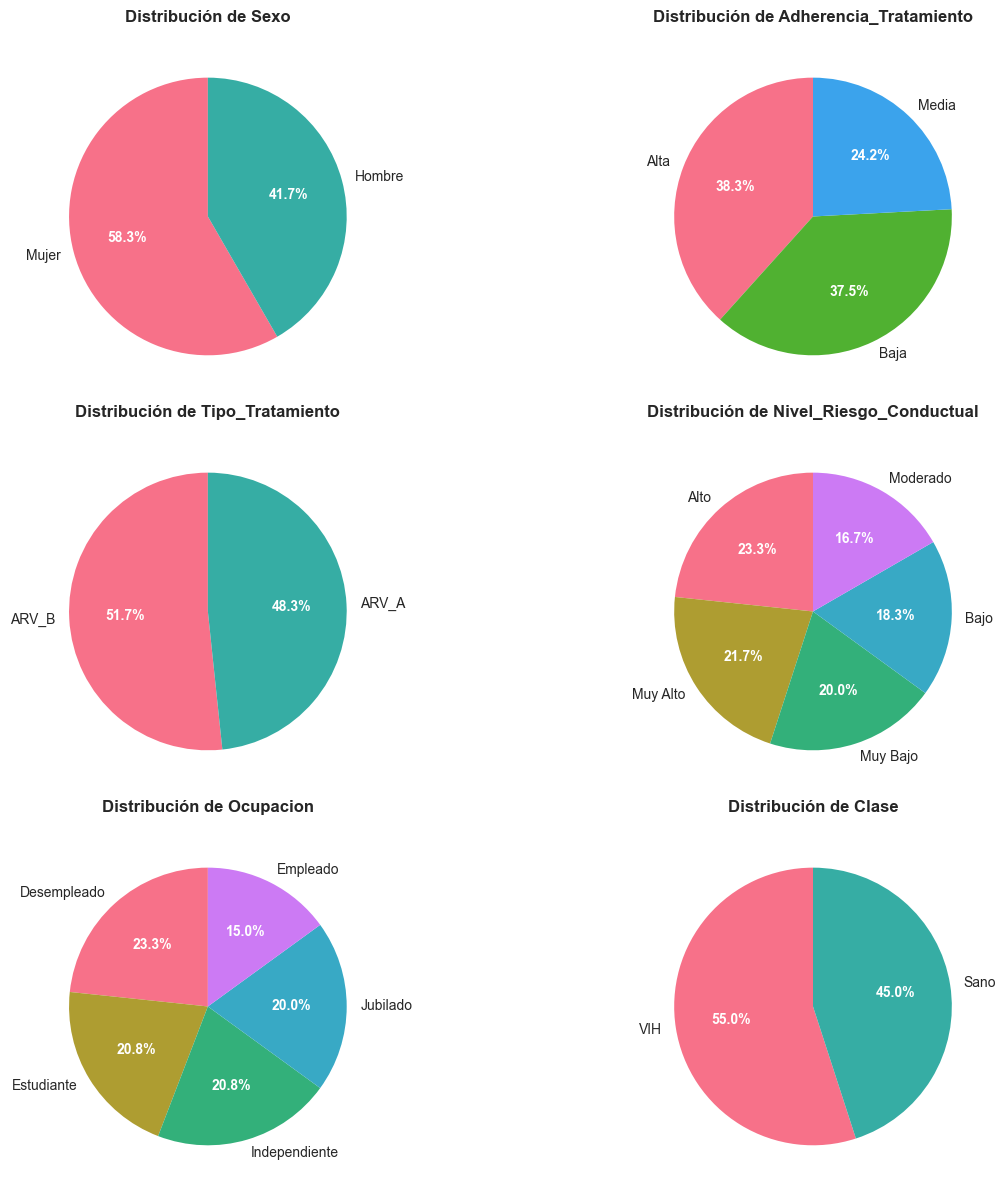


📊 6. ESTADÍSTICAS DESCRIPTIVAS (VARIABLES NUMÉRICAS)


Matplotlib is building the font cache; this may take a moment.


🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET

📊 1. TIPOS DE DATOS POR COLUMNA
------------------------------------------------------------


,Columna,Tipo de Dato,Tipo_Detallado,Valores_Unicos,Ejemplo
0,Sexo,object,str,2,Hombre
1,Adherencia_Tratamiento,object,str,3,Alta
2,Tipo_Tratamiento,object,str,2,ARV_B
3,Edad,int64,int,52,41
4,Carga_Viral_Log,float64,float,105,5.1200
5,Carga_Viral_Ajustada,float64,float,120,5.2674
6,CD4,int64,int,110,1040
7,Nivel_Riesgo_Conductual,object,str,5,Muy Bajo
8,Ocupacion,object,str,5,Estudiante
9,Clase,object,str,2,VIH



📊 RESUMEN DE TIPOS DE DATOS:
object     6
int64      2
float64    2
Name: count, dtype: int64

📌 Columnas numéricas (4): ['Edad', 'Carga_Viral_Log', 'Carga_Viral_Ajustada', 'CD4']
📌 Columnas categóricas (6): ['Sexo', 'Adherencia_Tratamiento', 'Tipo_Tratamiento', 'Nivel_Riesgo_Conductual', 'Ocupacion', 'Clase']
📌 Columnas booleanas (0): []

🔍 2. VALORES FALTANTES (NULOS)

📊 VALORES NULOS POR COLUMNA:


,Columna,Valores Nulos,Porcentaje
0,Sexo,0,0.0000
1,Adherencia_Tratamiento,0,0.0000
2,Tipo_Tratamiento,0,0.0000
3,Edad,0,0.0000
4,Carga_Viral_Log,0,0.0000
5,Carga_Viral_Ajustada,0,0.0000
6,CD4,0,0.0000
7,Nivel_Riesgo_Conductual,0,0.0000
8,Ocupacion,0,0.0000
9,Clase,0,0.0000



📌 TOTAL DE VALORES NULOS: 0 de 1200 celdas (0.00%)
📌 COLUMNAS CON NULOS: 0 de 10 columnas

📌 FILAS CON ALGÚN VALOR NULO: 0 de 120 filas (0.00%)

🔍 3. DATOS DUPLICADOS

📊 FILAS DUPLICADAS EXACTAS: 0 de 120 filas (0.00%)

📊 FILAS CON MISMOS DATOS PERO DIFERENTE CLASE: 0 (0.00%)

📌 La columna 'Carga_Viral_Ajustada' tiene valores únicos (posible identificador)

🔍 4. ANÁLISIS DE CONSISTENCIA

📊 CONSISTENCIA ENTRE CARGAS VIRALES:
   • Registros con diferencia >10%: 120 de 120 (100.00%)

📊 VERIFICACIÓN DE RANGOS LÓGICOS:
   • Edad (0-120 años): 0 valores fuera de rango
   • CD4 (0-2000 células/mm³): 0 valores fuera de rango
   • Carga Viral Log (0-10): 0 valores fuera de rango

🔍 5. ANÁLISIS DE VARIABLES CATEGÓRICAS

📊 DISTRIBUCIÓN DE 'Sexo':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Mujer,70,58.3333
1,Hombre,50,41.6667



📊 DISTRIBUCIÓN DE 'Adherencia_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alta,46,38.3333
1,Baja,45,37.5000
2,Media,29,24.1667



📊 DISTRIBUCIÓN DE 'Tipo_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,ARV_B,62,51.6667
1,ARV_A,58,48.3333



📊 DISTRIBUCIÓN DE 'Nivel_Riesgo_Conductual':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alto,28,23.3333
1,Muy Alto,26,21.6667
2,Muy Bajo,24,20.0000
3,Bajo,22,18.3333
4,Moderado,20,16.6667



📊 DISTRIBUCIÓN DE 'Ocupacion':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Desempleado,28,23.3333
1,Estudiante,25,20.8333
2,Independiente,25,20.8333
3,Jubilado,24,20.0000
4,Empleado,18,15.0000



📊 DISTRIBUCIÓN DE 'Clase':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,VIH,66,55.0000
1,Sano,54,45.0000


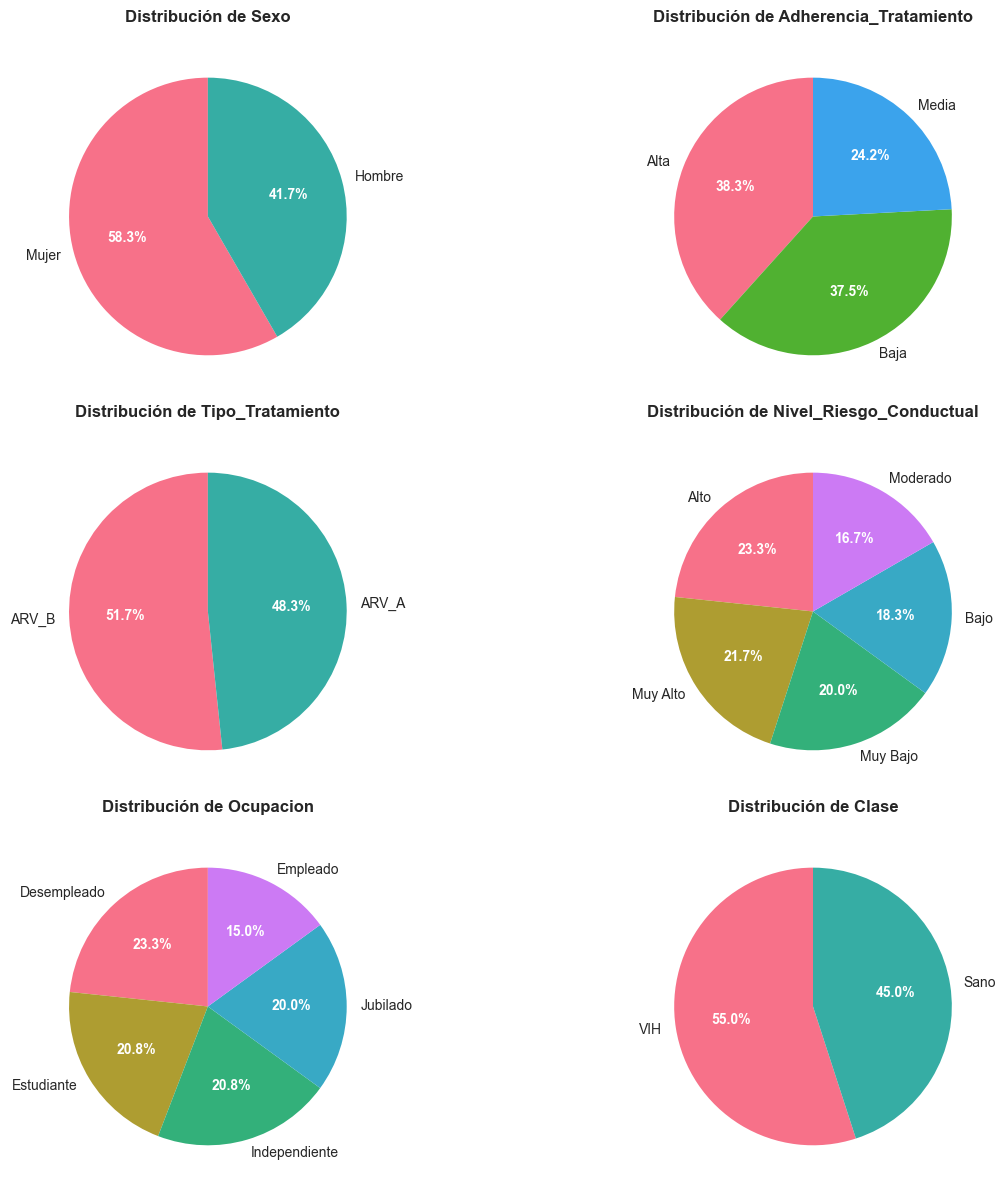


📊 6. ESTADÍSTICAS DESCRIPTIVAS (VARIABLES NUMÉRICAS)


,Variable,Media,Mediana,Std,Mín,Máx,Q1,Q3
0,Edad,48.1500,50.0000,14.8390,19.0000,73.0000,38.0000,60.2500
1,Carga_Viral_Log,4.6104,4.6100,1.2419,0.6100,9.1200,3.7725,5.3400
2,Carga_Viral_Ajustada,4.8426,4.8001,1.3016,0.7296,9.4254,3.8819,5.6265
3,CD4,731.5833,812.0000,309.0903,150.0000,1196.0000,518.2500,976.5000


Matplotlib is building the font cache; this may take a moment.


🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET

📊 1. TIPOS DE DATOS POR COLUMNA
------------------------------------------------------------


,Columna,Tipo de Dato,Tipo_Detallado,Valores_Unicos,Ejemplo
0,Sexo,object,str,2,Hombre
1,Adherencia_Tratamiento,object,str,3,Alta
2,Tipo_Tratamiento,object,str,2,ARV_B
3,Edad,int64,int,52,41
4,Carga_Viral_Log,float64,float,105,5.1200
5,Carga_Viral_Ajustada,float64,float,120,5.2674
6,CD4,int64,int,110,1040
7,Nivel_Riesgo_Conductual,object,str,5,Muy Bajo
8,Ocupacion,object,str,5,Estudiante
9,Clase,object,str,2,VIH



📊 RESUMEN DE TIPOS DE DATOS:
object     6
int64      2
float64    2
Name: count, dtype: int64

📌 Columnas numéricas (4): ['Edad', 'Carga_Viral_Log', 'Carga_Viral_Ajustada', 'CD4']
📌 Columnas categóricas (6): ['Sexo', 'Adherencia_Tratamiento', 'Tipo_Tratamiento', 'Nivel_Riesgo_Conductual', 'Ocupacion', 'Clase']
📌 Columnas booleanas (0): []

🔍 2. VALORES FALTANTES (NULOS)

📊 VALORES NULOS POR COLUMNA:


,Columna,Valores Nulos,Porcentaje
0,Sexo,0,0.0000
1,Adherencia_Tratamiento,0,0.0000
2,Tipo_Tratamiento,0,0.0000
3,Edad,0,0.0000
4,Carga_Viral_Log,0,0.0000
5,Carga_Viral_Ajustada,0,0.0000
6,CD4,0,0.0000
7,Nivel_Riesgo_Conductual,0,0.0000
8,Ocupacion,0,0.0000
9,Clase,0,0.0000



📌 TOTAL DE VALORES NULOS: 0 de 1200 celdas (0.00%)
📌 COLUMNAS CON NULOS: 0 de 10 columnas

📌 FILAS CON ALGÚN VALOR NULO: 0 de 120 filas (0.00%)

🔍 3. DATOS DUPLICADOS

📊 FILAS DUPLICADAS EXACTAS: 0 de 120 filas (0.00%)

📊 FILAS CON MISMOS DATOS PERO DIFERENTE CLASE: 0 (0.00%)

📌 La columna 'Carga_Viral_Ajustada' tiene valores únicos (posible identificador)

🔍 4. ANÁLISIS DE CONSISTENCIA

📊 CONSISTENCIA ENTRE CARGAS VIRALES:
   • Registros con diferencia >10%: 120 de 120 (100.00%)

📊 VERIFICACIÓN DE RANGOS LÓGICOS:
   • Edad (0-120 años): 0 valores fuera de rango
   • CD4 (0-2000 células/mm³): 0 valores fuera de rango
   • Carga Viral Log (0-10): 0 valores fuera de rango

🔍 5. ANÁLISIS DE VARIABLES CATEGÓRICAS

📊 DISTRIBUCIÓN DE 'Sexo':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Mujer,70,58.3333
1,Hombre,50,41.6667



📊 DISTRIBUCIÓN DE 'Adherencia_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alta,46,38.3333
1,Baja,45,37.5000
2,Media,29,24.1667



📊 DISTRIBUCIÓN DE 'Tipo_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,ARV_B,62,51.6667
1,ARV_A,58,48.3333



📊 DISTRIBUCIÓN DE 'Nivel_Riesgo_Conductual':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alto,28,23.3333
1,Muy Alto,26,21.6667
2,Muy Bajo,24,20.0000
3,Bajo,22,18.3333
4,Moderado,20,16.6667



📊 DISTRIBUCIÓN DE 'Ocupacion':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Desempleado,28,23.3333
1,Estudiante,25,20.8333
2,Independiente,25,20.8333
3,Jubilado,24,20.0000
4,Empleado,18,15.0000



📊 DISTRIBUCIÓN DE 'Clase':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,VIH,66,55.0000
1,Sano,54,45.0000


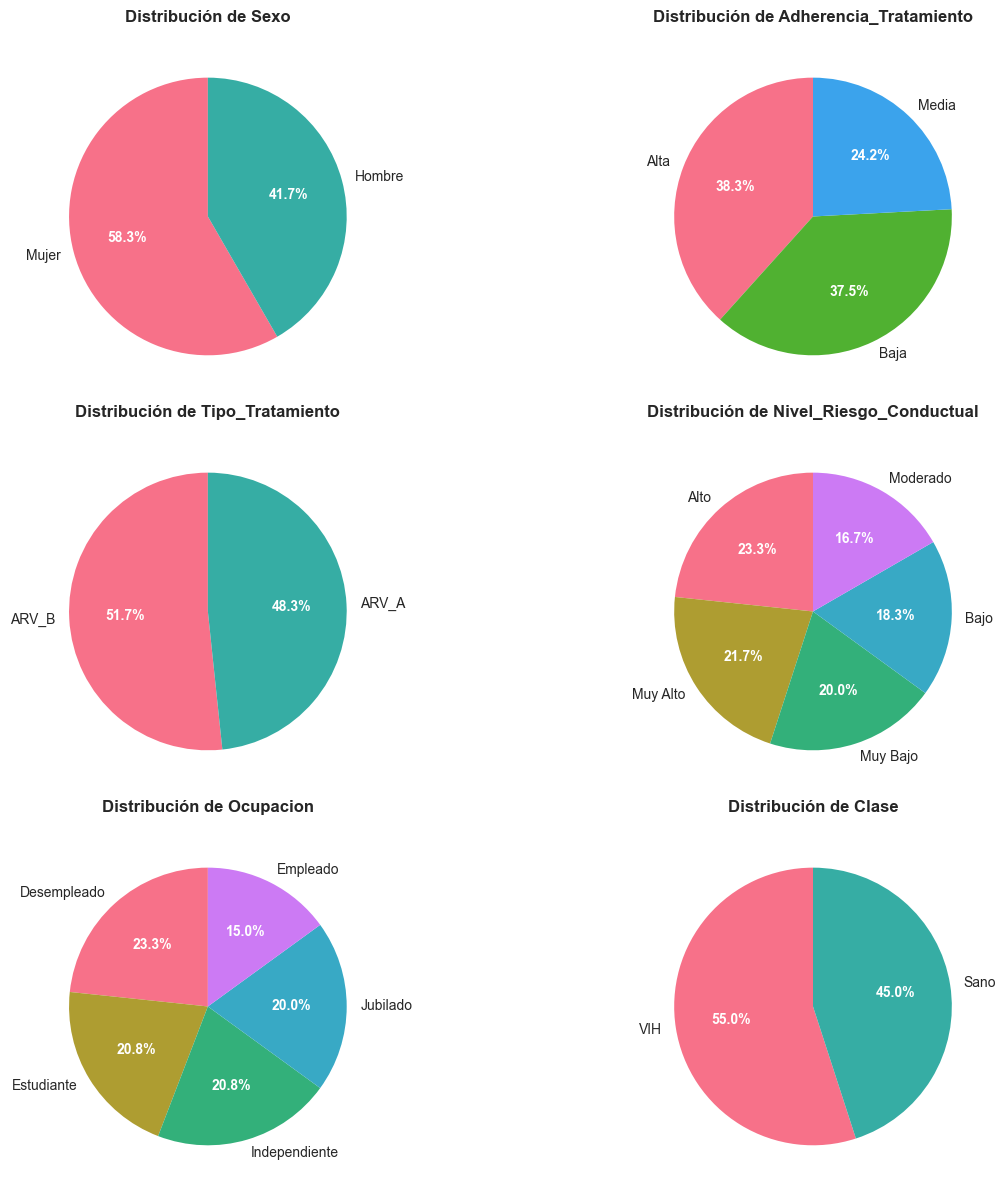


📊 6. ESTADÍSTICAS DESCRIPTIVAS (VARIABLES NUMÉRICAS)


,Variable,Media,Mediana,Std,Mín,Máx,Q1,Q3
0,Edad,48.1500,50.0000,14.8390,19.0000,73.0000,38.0000,60.2500
1,Carga_Viral_Log,4.6104,4.6100,1.2419,0.6100,9.1200,3.7725,5.3400
2,Carga_Viral_Ajustada,4.8426,4.8001,1.3016,0.7296,9.4254,3.8819,5.6265
3,CD4,731.5833,812.0000,309.0903,150.0000,1196.0000,518.2500,976.5000


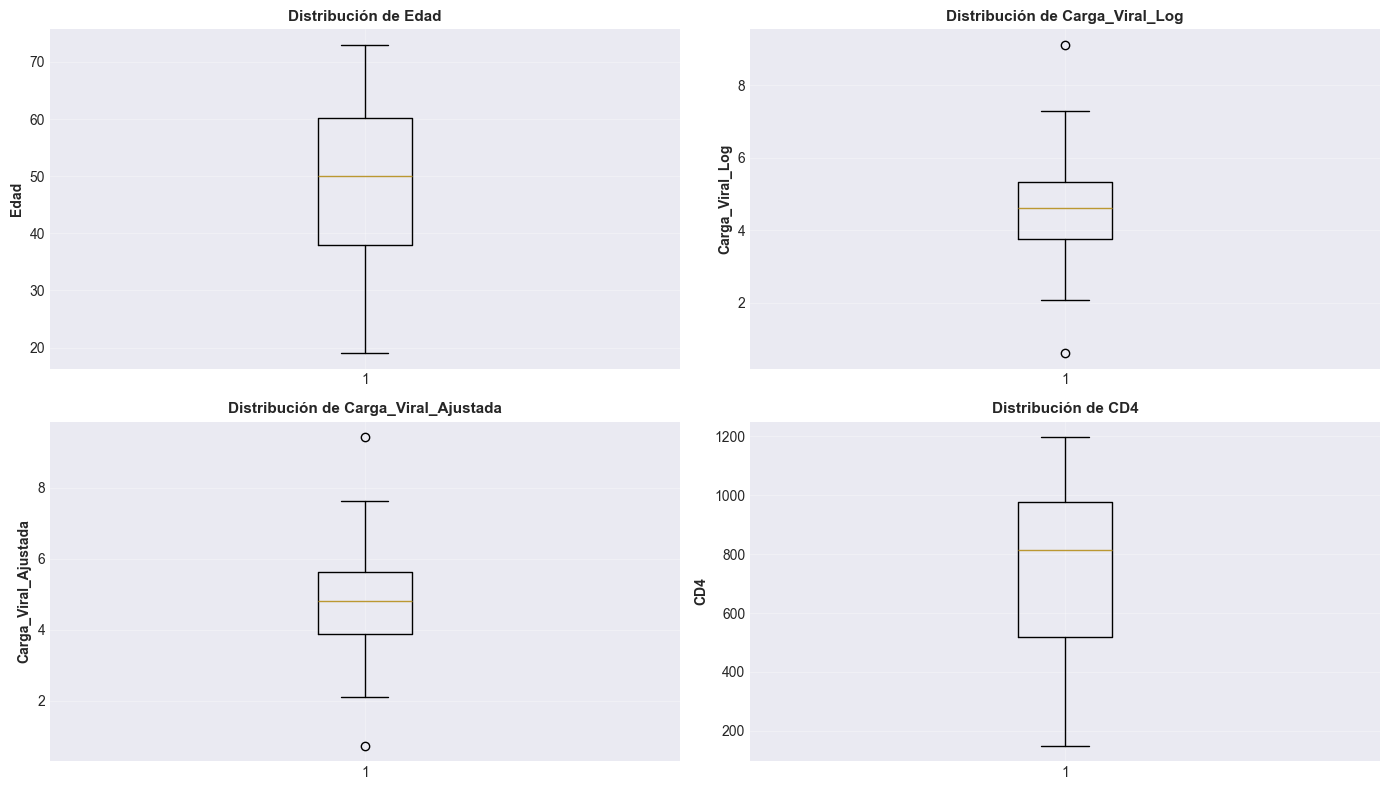


🎯 7. ANÁLISIS DE LA VARIABLE OBJETIVO

📊 DISTRIBUCIÓN DE CLASES:
----------------------------------------


Matplotlib is building the font cache; this may take a moment.


🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET

📊 1. TIPOS DE DATOS POR COLUMNA
------------------------------------------------------------


,Columna,Tipo de Dato,Tipo_Detallado,Valores_Unicos,Ejemplo
0,Sexo,object,str,2,Hombre
1,Adherencia_Tratamiento,object,str,3,Alta
2,Tipo_Tratamiento,object,str,2,ARV_B
3,Edad,int64,int,52,41
4,Carga_Viral_Log,float64,float,105,5.1200
5,Carga_Viral_Ajustada,float64,float,120,5.2674
6,CD4,int64,int,110,1040
7,Nivel_Riesgo_Conductual,object,str,5,Muy Bajo
8,Ocupacion,object,str,5,Estudiante
9,Clase,object,str,2,VIH



📊 RESUMEN DE TIPOS DE DATOS:
object     6
int64      2
float64    2
Name: count, dtype: int64

📌 Columnas numéricas (4): ['Edad', 'Carga_Viral_Log', 'Carga_Viral_Ajustada', 'CD4']
📌 Columnas categóricas (6): ['Sexo', 'Adherencia_Tratamiento', 'Tipo_Tratamiento', 'Nivel_Riesgo_Conductual', 'Ocupacion', 'Clase']
📌 Columnas booleanas (0): []

🔍 2. VALORES FALTANTES (NULOS)

📊 VALORES NULOS POR COLUMNA:


,Columna,Valores Nulos,Porcentaje
0,Sexo,0,0.0000
1,Adherencia_Tratamiento,0,0.0000
2,Tipo_Tratamiento,0,0.0000
3,Edad,0,0.0000
4,Carga_Viral_Log,0,0.0000
5,Carga_Viral_Ajustada,0,0.0000
6,CD4,0,0.0000
7,Nivel_Riesgo_Conductual,0,0.0000
8,Ocupacion,0,0.0000
9,Clase,0,0.0000



📌 TOTAL DE VALORES NULOS: 0 de 1200 celdas (0.00%)
📌 COLUMNAS CON NULOS: 0 de 10 columnas

📌 FILAS CON ALGÚN VALOR NULO: 0 de 120 filas (0.00%)

🔍 3. DATOS DUPLICADOS

📊 FILAS DUPLICADAS EXACTAS: 0 de 120 filas (0.00%)

📊 FILAS CON MISMOS DATOS PERO DIFERENTE CLASE: 0 (0.00%)

📌 La columna 'Carga_Viral_Ajustada' tiene valores únicos (posible identificador)

🔍 4. ANÁLISIS DE CONSISTENCIA

📊 CONSISTENCIA ENTRE CARGAS VIRALES:
   • Registros con diferencia >10%: 120 de 120 (100.00%)

📊 VERIFICACIÓN DE RANGOS LÓGICOS:
   • Edad (0-120 años): 0 valores fuera de rango
   • CD4 (0-2000 células/mm³): 0 valores fuera de rango
   • Carga Viral Log (0-10): 0 valores fuera de rango

🔍 5. ANÁLISIS DE VARIABLES CATEGÓRICAS

📊 DISTRIBUCIÓN DE 'Sexo':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Mujer,70,58.3333
1,Hombre,50,41.6667



📊 DISTRIBUCIÓN DE 'Adherencia_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alta,46,38.3333
1,Baja,45,37.5000
2,Media,29,24.1667



📊 DISTRIBUCIÓN DE 'Tipo_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,ARV_B,62,51.6667
1,ARV_A,58,48.3333



📊 DISTRIBUCIÓN DE 'Nivel_Riesgo_Conductual':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alto,28,23.3333
1,Muy Alto,26,21.6667
2,Muy Bajo,24,20.0000
3,Bajo,22,18.3333
4,Moderado,20,16.6667



📊 DISTRIBUCIÓN DE 'Ocupacion':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Desempleado,28,23.3333
1,Estudiante,25,20.8333
2,Independiente,25,20.8333
3,Jubilado,24,20.0000
4,Empleado,18,15.0000



📊 DISTRIBUCIÓN DE 'Clase':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,VIH,66,55.0000
1,Sano,54,45.0000


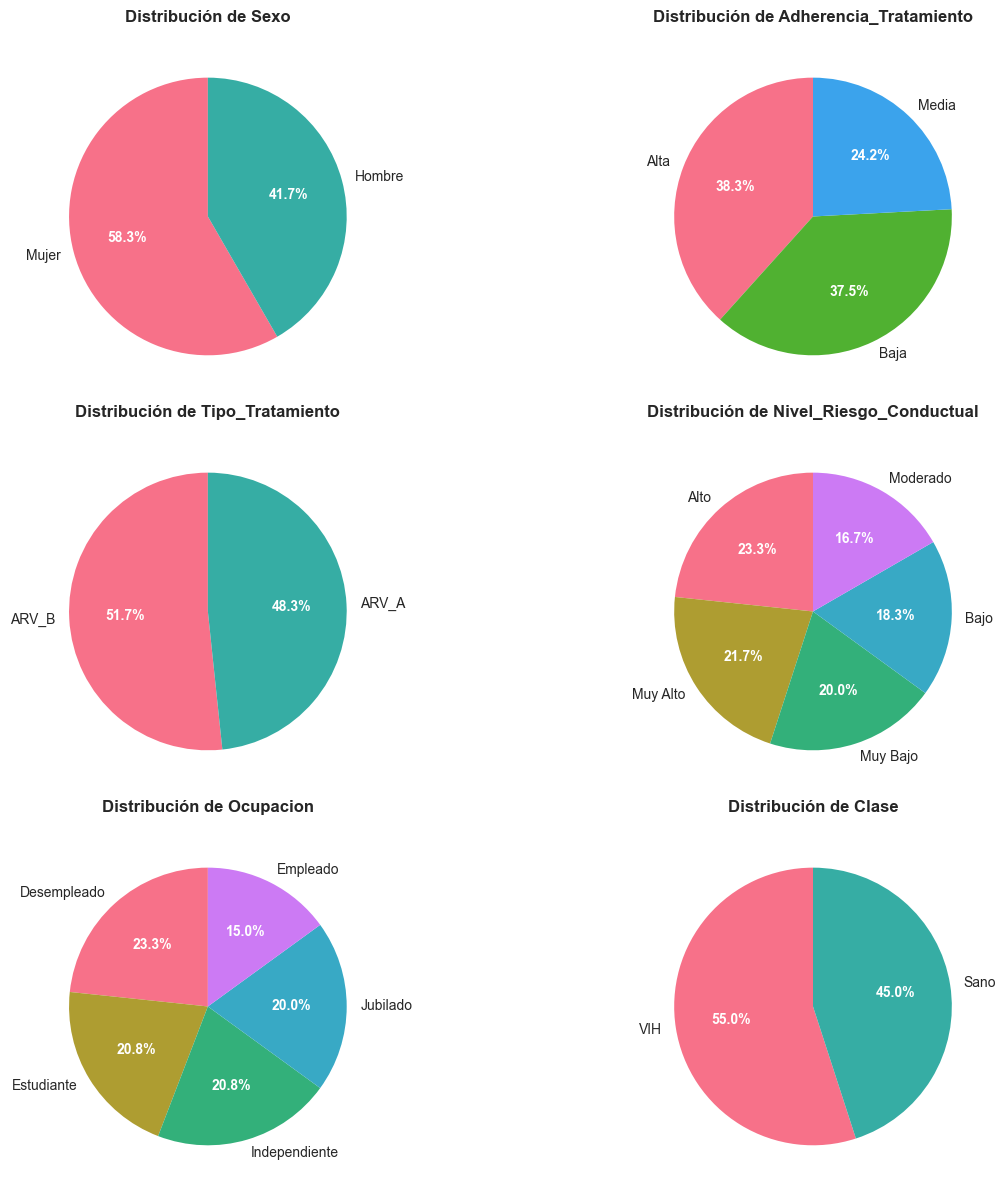


📊 6. ESTADÍSTICAS DESCRIPTIVAS (VARIABLES NUMÉRICAS)


,Variable,Media,Mediana,Std,Mín,Máx,Q1,Q3
0,Edad,48.1500,50.0000,14.8390,19.0000,73.0000,38.0000,60.2500
1,Carga_Viral_Log,4.6104,4.6100,1.2419,0.6100,9.1200,3.7725,5.3400
2,Carga_Viral_Ajustada,4.8426,4.8001,1.3016,0.7296,9.4254,3.8819,5.6265
3,CD4,731.5833,812.0000,309.0903,150.0000,1196.0000,518.2500,976.5000


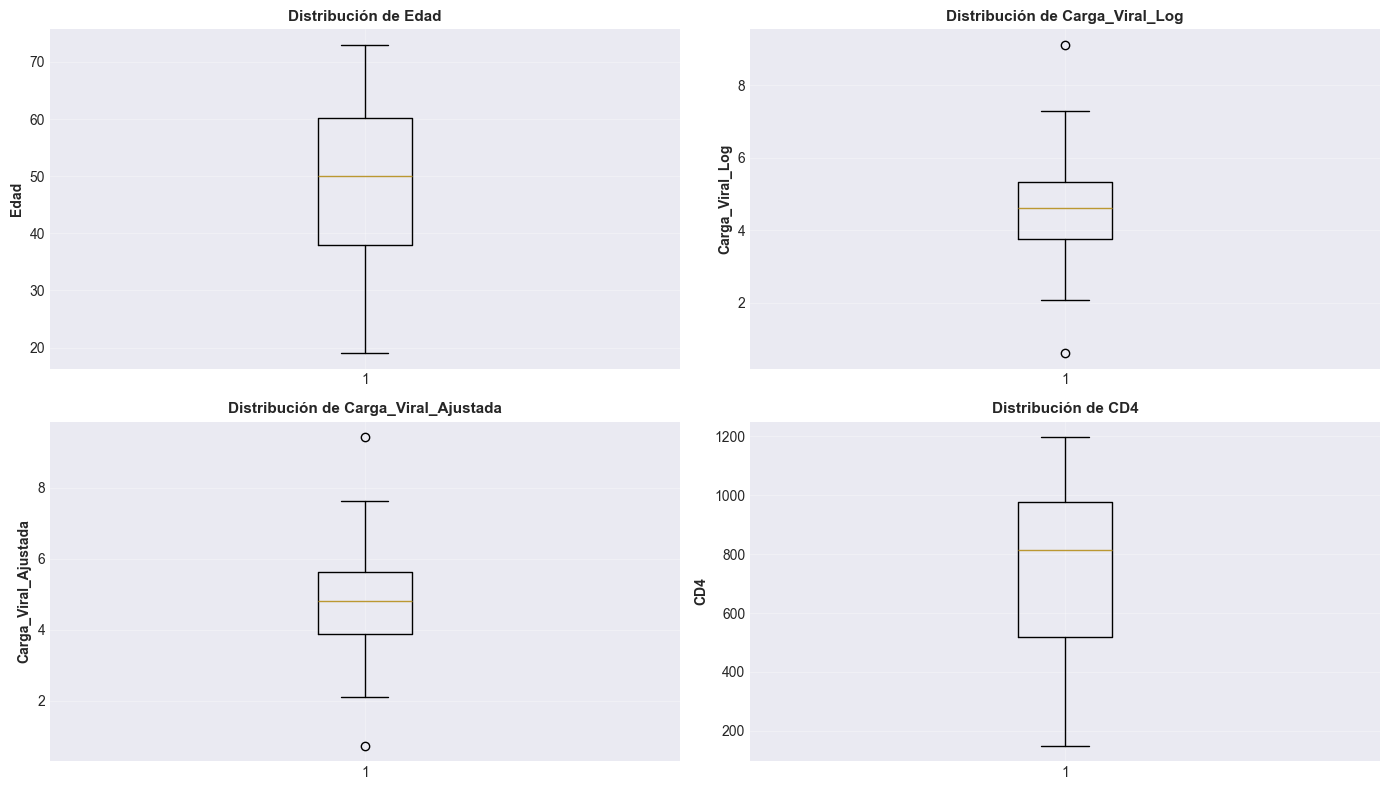


🎯 7. ANÁLISIS DE LA VARIABLE OBJETIVO

📊 DISTRIBUCIÓN DE CLASES:
----------------------------------------


,Clase,Cantidad,Porcentaje (%)
0,VIH,66,55.0000
1,Sano,54,45.0000


Matplotlib is building the font cache; this may take a moment.


🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET

📊 1. TIPOS DE DATOS POR COLUMNA
------------------------------------------------------------


,Columna,Tipo de Dato,Tipo_Detallado,Valores_Unicos,Ejemplo
0,Sexo,object,str,2,Hombre
1,Adherencia_Tratamiento,object,str,3,Alta
2,Tipo_Tratamiento,object,str,2,ARV_B
3,Edad,int64,int,52,41
4,Carga_Viral_Log,float64,float,105,5.1200
5,Carga_Viral_Ajustada,float64,float,120,5.2674
6,CD4,int64,int,110,1040
7,Nivel_Riesgo_Conductual,object,str,5,Muy Bajo
8,Ocupacion,object,str,5,Estudiante
9,Clase,object,str,2,VIH



📊 RESUMEN DE TIPOS DE DATOS:
object     6
int64      2
float64    2
Name: count, dtype: int64

📌 Columnas numéricas (4): ['Edad', 'Carga_Viral_Log', 'Carga_Viral_Ajustada', 'CD4']
📌 Columnas categóricas (6): ['Sexo', 'Adherencia_Tratamiento', 'Tipo_Tratamiento', 'Nivel_Riesgo_Conductual', 'Ocupacion', 'Clase']
📌 Columnas booleanas (0): []

🔍 2. VALORES FALTANTES (NULOS)

📊 VALORES NULOS POR COLUMNA:


,Columna,Valores Nulos,Porcentaje
0,Sexo,0,0.0000
1,Adherencia_Tratamiento,0,0.0000
2,Tipo_Tratamiento,0,0.0000
3,Edad,0,0.0000
4,Carga_Viral_Log,0,0.0000
5,Carga_Viral_Ajustada,0,0.0000
6,CD4,0,0.0000
7,Nivel_Riesgo_Conductual,0,0.0000
8,Ocupacion,0,0.0000
9,Clase,0,0.0000



📌 TOTAL DE VALORES NULOS: 0 de 1200 celdas (0.00%)
📌 COLUMNAS CON NULOS: 0 de 10 columnas

📌 FILAS CON ALGÚN VALOR NULO: 0 de 120 filas (0.00%)

🔍 3. DATOS DUPLICADOS

📊 FILAS DUPLICADAS EXACTAS: 0 de 120 filas (0.00%)

📊 FILAS CON MISMOS DATOS PERO DIFERENTE CLASE: 0 (0.00%)

📌 La columna 'Carga_Viral_Ajustada' tiene valores únicos (posible identificador)

🔍 4. ANÁLISIS DE CONSISTENCIA

📊 CONSISTENCIA ENTRE CARGAS VIRALES:
   • Registros con diferencia >10%: 120 de 120 (100.00%)

📊 VERIFICACIÓN DE RANGOS LÓGICOS:
   • Edad (0-120 años): 0 valores fuera de rango
   • CD4 (0-2000 células/mm³): 0 valores fuera de rango
   • Carga Viral Log (0-10): 0 valores fuera de rango

🔍 5. ANÁLISIS DE VARIABLES CATEGÓRICAS

📊 DISTRIBUCIÓN DE 'Sexo':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Mujer,70,58.3333
1,Hombre,50,41.6667



📊 DISTRIBUCIÓN DE 'Adherencia_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alta,46,38.3333
1,Baja,45,37.5000
2,Media,29,24.1667



📊 DISTRIBUCIÓN DE 'Tipo_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,ARV_B,62,51.6667
1,ARV_A,58,48.3333



📊 DISTRIBUCIÓN DE 'Nivel_Riesgo_Conductual':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alto,28,23.3333
1,Muy Alto,26,21.6667
2,Muy Bajo,24,20.0000
3,Bajo,22,18.3333
4,Moderado,20,16.6667



📊 DISTRIBUCIÓN DE 'Ocupacion':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Desempleado,28,23.3333
1,Estudiante,25,20.8333
2,Independiente,25,20.8333
3,Jubilado,24,20.0000
4,Empleado,18,15.0000



📊 DISTRIBUCIÓN DE 'Clase':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,VIH,66,55.0000
1,Sano,54,45.0000


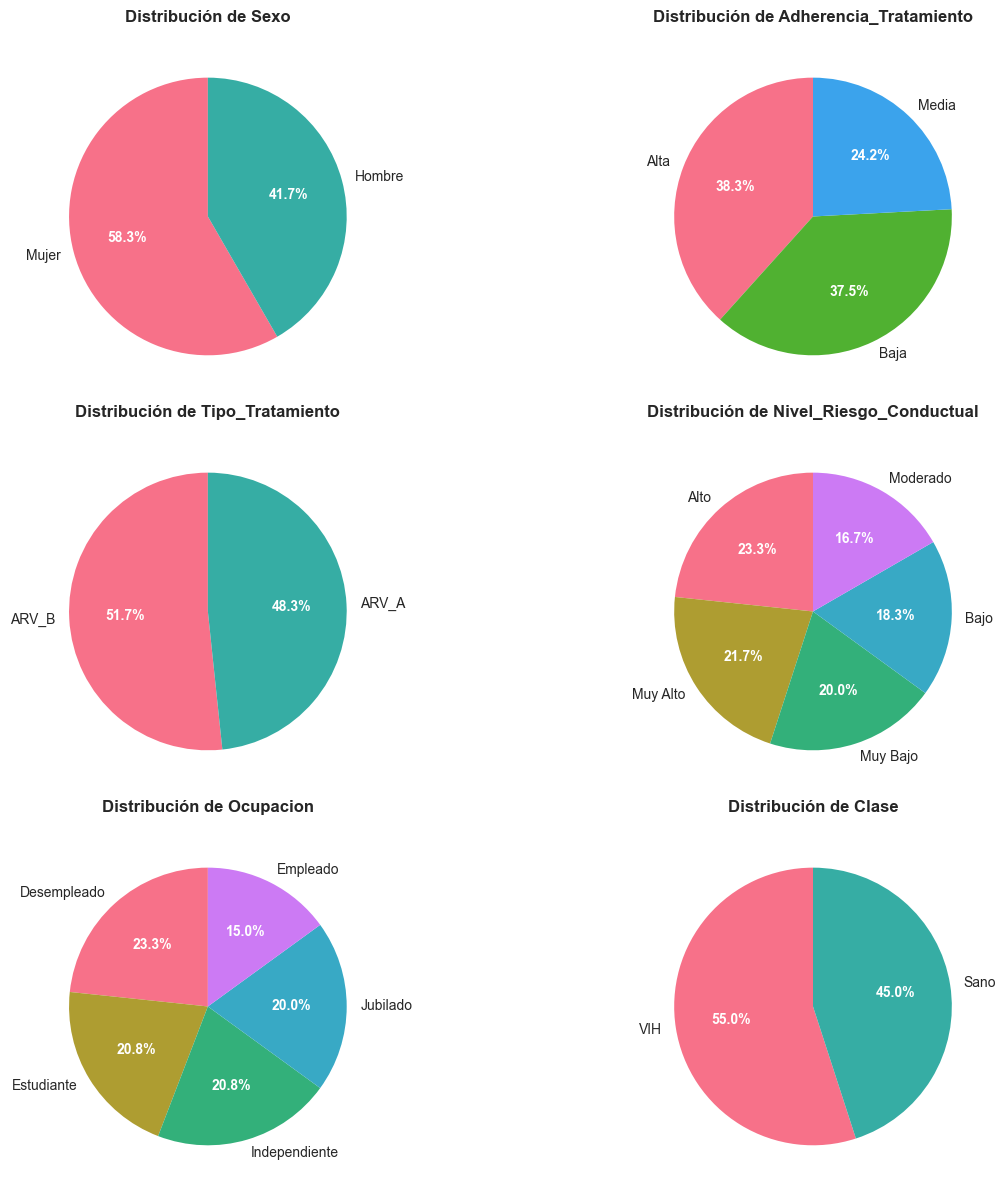


📊 6. ESTADÍSTICAS DESCRIPTIVAS (VARIABLES NUMÉRICAS)


,Variable,Media,Mediana,Std,Mín,Máx,Q1,Q3
0,Edad,48.1500,50.0000,14.8390,19.0000,73.0000,38.0000,60.2500
1,Carga_Viral_Log,4.6104,4.6100,1.2419,0.6100,9.1200,3.7725,5.3400
2,Carga_Viral_Ajustada,4.8426,4.8001,1.3016,0.7296,9.4254,3.8819,5.6265
3,CD4,731.5833,812.0000,309.0903,150.0000,1196.0000,518.2500,976.5000


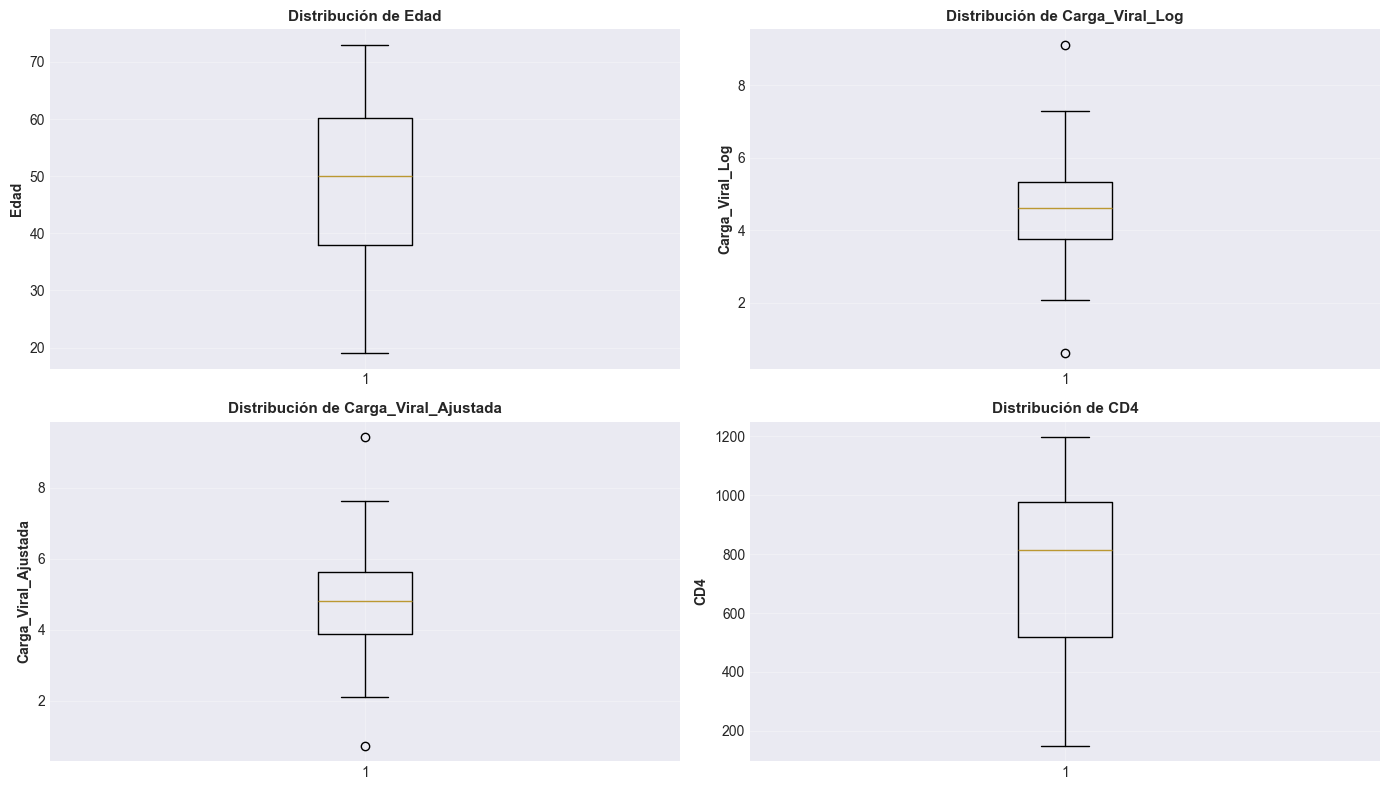


🎯 7. ANÁLISIS DE LA VARIABLE OBJETIVO

📊 DISTRIBUCIÓN DE CLASES:
----------------------------------------


,Clase,Cantidad,Porcentaje (%)
0,VIH,66,55.0000
1,Sano,54,45.0000


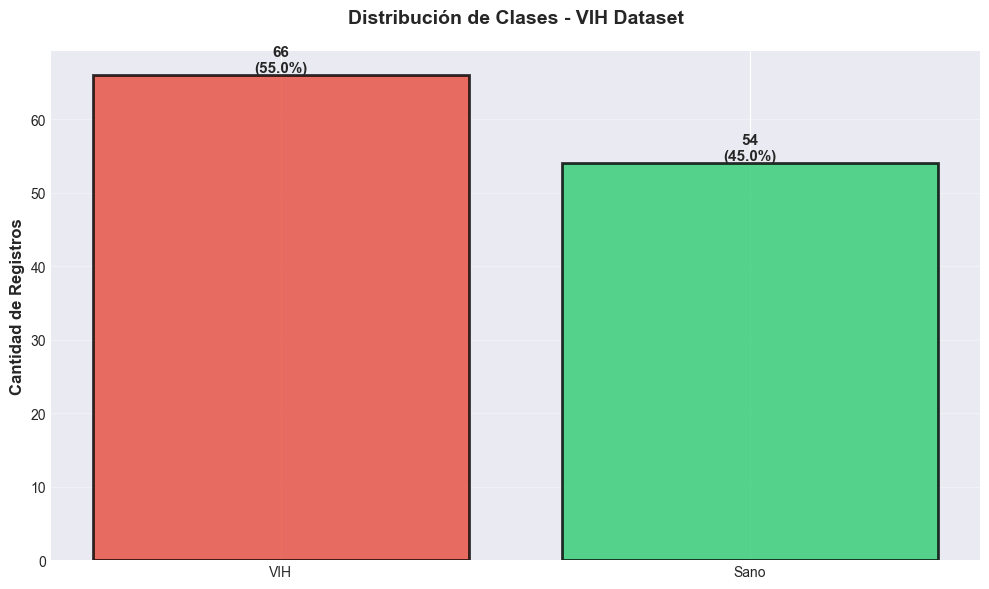


✅ LAS CLASES ESTÁN RELATIVAMENTE BALANCEADAS

📋 RESUMEN FINAL DEL ANÁLISIS - VIH DATASET


Matplotlib is building the font cache; this may take a moment.


🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET

📊 1. TIPOS DE DATOS POR COLUMNA
------------------------------------------------------------


,Columna,Tipo de Dato,Tipo_Detallado,Valores_Unicos,Ejemplo
0,Sexo,object,str,2,Hombre
1,Adherencia_Tratamiento,object,str,3,Alta
2,Tipo_Tratamiento,object,str,2,ARV_B
3,Edad,int64,int,52,41
4,Carga_Viral_Log,float64,float,105,5.1200
5,Carga_Viral_Ajustada,float64,float,120,5.2674
6,CD4,int64,int,110,1040
7,Nivel_Riesgo_Conductual,object,str,5,Muy Bajo
8,Ocupacion,object,str,5,Estudiante
9,Clase,object,str,2,VIH



📊 RESUMEN DE TIPOS DE DATOS:
object     6
int64      2
float64    2
Name: count, dtype: int64

📌 Columnas numéricas (4): ['Edad', 'Carga_Viral_Log', 'Carga_Viral_Ajustada', 'CD4']
📌 Columnas categóricas (6): ['Sexo', 'Adherencia_Tratamiento', 'Tipo_Tratamiento', 'Nivel_Riesgo_Conductual', 'Ocupacion', 'Clase']
📌 Columnas booleanas (0): []

🔍 2. VALORES FALTANTES (NULOS)

📊 VALORES NULOS POR COLUMNA:


,Columna,Valores Nulos,Porcentaje
0,Sexo,0,0.0000
1,Adherencia_Tratamiento,0,0.0000
2,Tipo_Tratamiento,0,0.0000
3,Edad,0,0.0000
4,Carga_Viral_Log,0,0.0000
5,Carga_Viral_Ajustada,0,0.0000
6,CD4,0,0.0000
7,Nivel_Riesgo_Conductual,0,0.0000
8,Ocupacion,0,0.0000
9,Clase,0,0.0000



📌 TOTAL DE VALORES NULOS: 0 de 1200 celdas (0.00%)
📌 COLUMNAS CON NULOS: 0 de 10 columnas

📌 FILAS CON ALGÚN VALOR NULO: 0 de 120 filas (0.00%)

🔍 3. DATOS DUPLICADOS

📊 FILAS DUPLICADAS EXACTAS: 0 de 120 filas (0.00%)

📊 FILAS CON MISMOS DATOS PERO DIFERENTE CLASE: 0 (0.00%)

📌 La columna 'Carga_Viral_Ajustada' tiene valores únicos (posible identificador)

🔍 4. ANÁLISIS DE CONSISTENCIA

📊 CONSISTENCIA ENTRE CARGAS VIRALES:
   • Registros con diferencia >10%: 120 de 120 (100.00%)

📊 VERIFICACIÓN DE RANGOS LÓGICOS:
   • Edad (0-120 años): 0 valores fuera de rango
   • CD4 (0-2000 células/mm³): 0 valores fuera de rango
   • Carga Viral Log (0-10): 0 valores fuera de rango

🔍 5. ANÁLISIS DE VARIABLES CATEGÓRICAS

📊 DISTRIBUCIÓN DE 'Sexo':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Mujer,70,58.3333
1,Hombre,50,41.6667



📊 DISTRIBUCIÓN DE 'Adherencia_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alta,46,38.3333
1,Baja,45,37.5000
2,Media,29,24.1667



📊 DISTRIBUCIÓN DE 'Tipo_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,ARV_B,62,51.6667
1,ARV_A,58,48.3333



📊 DISTRIBUCIÓN DE 'Nivel_Riesgo_Conductual':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alto,28,23.3333
1,Muy Alto,26,21.6667
2,Muy Bajo,24,20.0000
3,Bajo,22,18.3333
4,Moderado,20,16.6667



📊 DISTRIBUCIÓN DE 'Ocupacion':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Desempleado,28,23.3333
1,Estudiante,25,20.8333
2,Independiente,25,20.8333
3,Jubilado,24,20.0000
4,Empleado,18,15.0000



📊 DISTRIBUCIÓN DE 'Clase':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,VIH,66,55.0000
1,Sano,54,45.0000


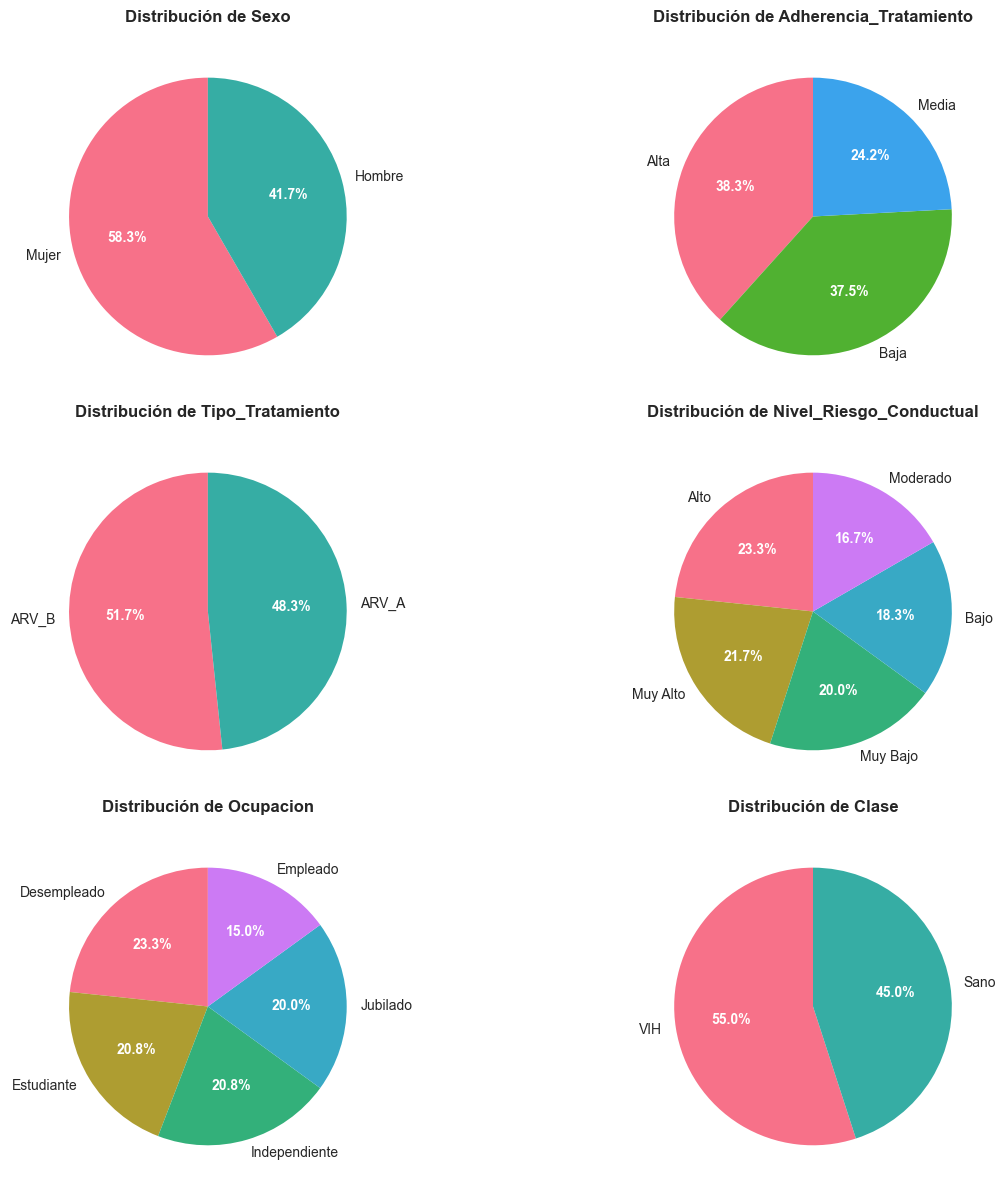


📊 6. ESTADÍSTICAS DESCRIPTIVAS (VARIABLES NUMÉRICAS)


,Variable,Media,Mediana,Std,Mín,Máx,Q1,Q3
0,Edad,48.1500,50.0000,14.8390,19.0000,73.0000,38.0000,60.2500
1,Carga_Viral_Log,4.6104,4.6100,1.2419,0.6100,9.1200,3.7725,5.3400
2,Carga_Viral_Ajustada,4.8426,4.8001,1.3016,0.7296,9.4254,3.8819,5.6265
3,CD4,731.5833,812.0000,309.0903,150.0000,1196.0000,518.2500,976.5000


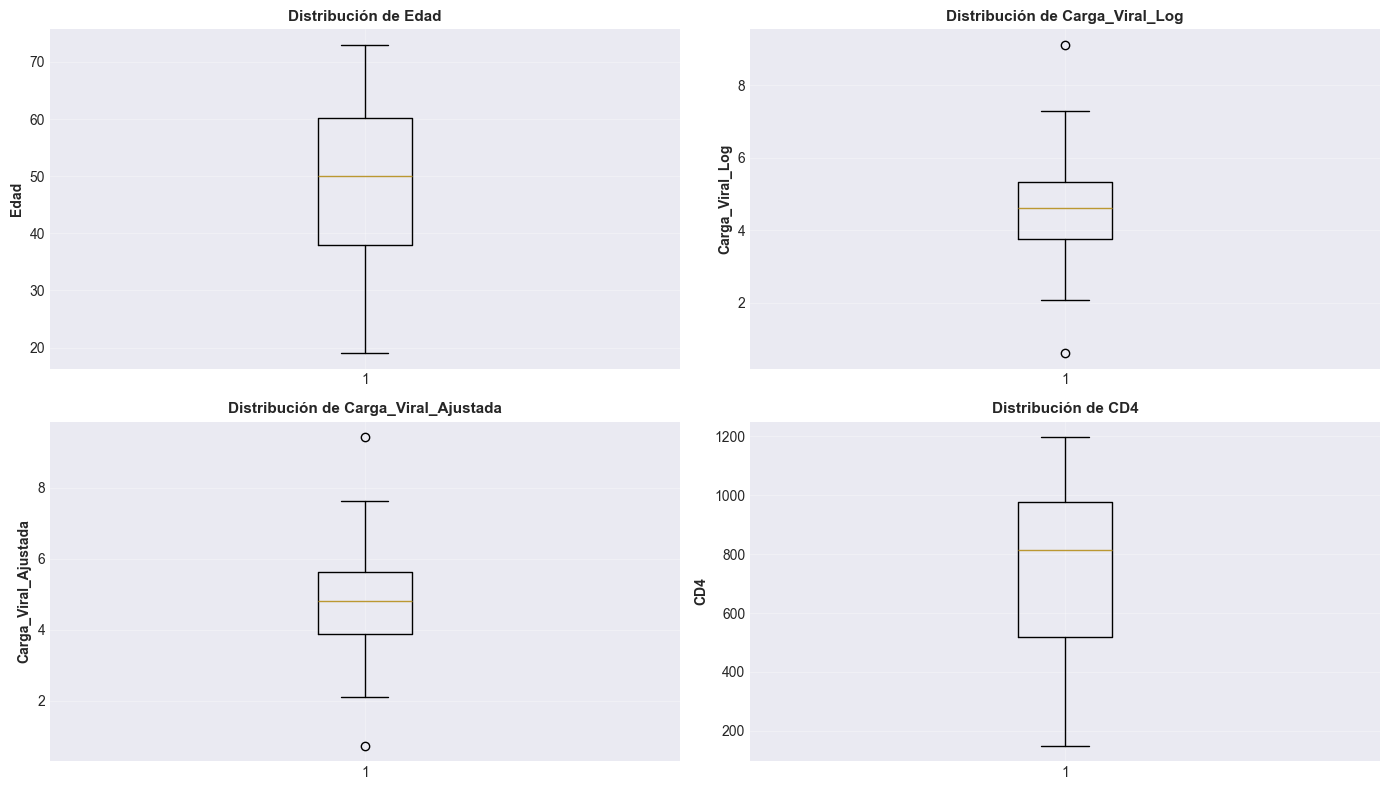


🎯 7. ANÁLISIS DE LA VARIABLE OBJETIVO

📊 DISTRIBUCIÓN DE CLASES:
----------------------------------------


,Clase,Cantidad,Porcentaje (%)
0,VIH,66,55.0000
1,Sano,54,45.0000


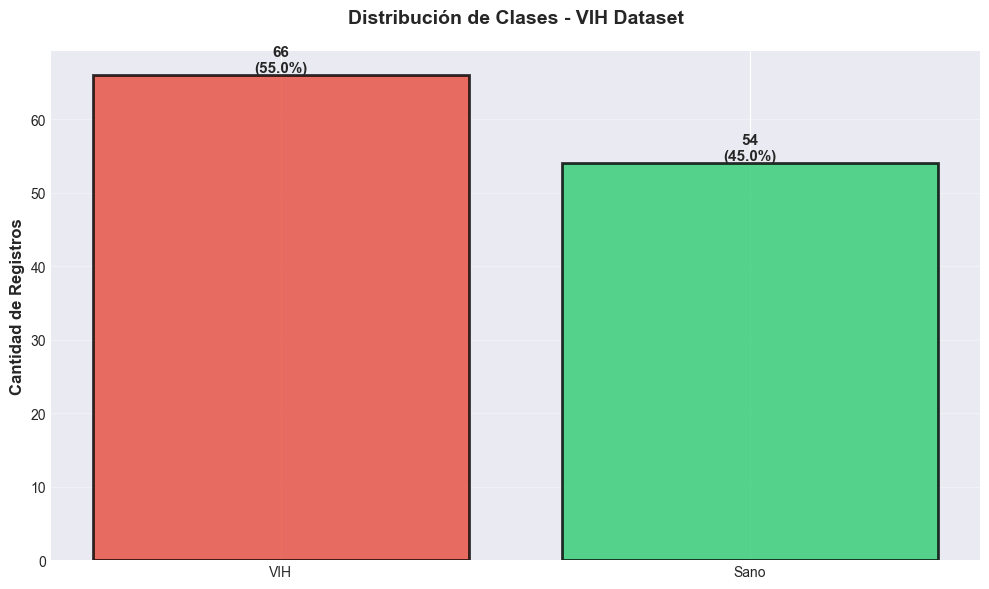


✅ LAS CLASES ESTÁN RELATIVAMENTE BALANCEADAS

📋 RESUMEN FINAL DEL ANÁLISIS - VIH DATASET


,Métrica,Valor
0,Total de Filas,120
1,Total de Columnas,10
2,Total de Celdas,1200
3,Valores Nulos Totales,0
4,% Valores Nulos,0.00%
5,Columnas con Nulos,0
6,Filas con Nulos,0
7,% Filas con Nulos,0.00%
8,Filas Duplicadas,0
9,% Filas Duplicadas,0.00%



💡 RECOMENDACIONES BASADAS EN EL ANÁLISIS:
------------------------------------------------------------

✅ VARIABLES NUMÉRICAS:
  • Estandarizar/normalizar para modelos ML
  • Verificar outliers con boxplots
  • Analizar correlaciones entre variables numéricas

✅ VARIABLES CATEGÓRICAS:
  • One-hot encoding para modelos ML
  • Label encoding si hay orden (Adherencia, Riesgo)
  • Verificar categorías poco frecuentes

✅ CONSISTENCIA DE DATOS:
  • Revisar 120 registros con inconsistencia en carga viral

✅ ANÁLISIS DE TIPOS, NULOS Y DUPLICADOS COMPLETADO


In [4]:
# Continuando con el df que ya cargaste
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET")
print("="*80)

# 1. ANÁLISIS DE TIPOS DE DATOS
print("\n📊 1. TIPOS DE DATOS POR COLUMNA")
print("-"*60)

# Crear un DataFrame con información de tipos
tipos_df = pd.DataFrame({
    'Columna': df.columns,
    'Tipo de Dato': df.dtypes.values,
    'Tipo_Detallado': [df[col].apply(type).iloc[0].__name__ if len(df) > 0 else 'Unknown' for col in df.columns],
    'Valores_Unicos': [df[col].nunique() for col in df.columns],
    'Ejemplo': [df[col].iloc[0] if len(df) > 0 else 'No hay datos' for col in df.columns]
})
display(tipos_df)

# Resumen de tipos de datos
print("\n📊 RESUMEN DE TIPOS DE DATOS:")
print(df.dtypes.value_counts())

# Clasificar columnas por tipo
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
booleanas = df.select_dtypes(include=['bool']).columns.tolist()

print(f"\n📌 Columnas numéricas ({len(numericas)}): {numericas}")
print(f"📌 Columnas categóricas ({len(categoricas)}): {categoricas}")
print(f"📌 Columnas booleanas ({len(booleanas)}): {booleanas}")

# 2. ANÁLISIS DE VALORES FALTANTES
print("\n" + "="*80)
print("🔍 2. VALORES FALTANTES (NULOS)")
print("="*80)

# Calcular valores nulos
nulos = df.isnull().sum()
nulos_porcentaje = (nulos / len(df)) * 100

# Crear DataFrame de nulos
nulos_df = pd.DataFrame({
    'Columna': nulos.index,
    'Valores Nulos': nulos.values,
    'Porcentaje': nulos_porcentaje.values
})
nulos_df = nulos_df.sort_values('Valores Nulos', ascending=False)

print("\n📊 VALORES NULOS POR COLUMNA:")
display(nulos_df)

# Visualizar valores nulos con gráfico
if nulos_df['Valores Nulos'].sum() > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    nulos_df_plot = nulos_df[nulos_df['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=True)
    colors = plt.cm.RdYlGn_r(nulos_df_plot['Porcentaje'] / nulos_df_plot['Porcentaje'].max())
    bars = ax.barh(nulos_df_plot['Columna'], nulos_df_plot['Valores Nulos'], color=colors)
    ax.set_xlabel('Cantidad de Valores Nulos', fontsize=12, fontweight='bold')
    ax.set_title('Distribución de Valores Nulos por Columna', fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3)
    
    # Agregar valores en las barras
    for i, (bar, val, pct) in enumerate(zip(bars, nulos_df_plot['Valores Nulos'], nulos_df_plot['Porcentaje'])):
        ax.text(val, bar.get_y() + bar.get_height()/2, f' {val} ({pct:.1f}%)', 
                va='center', fontweight='bold', fontsize=10)
    plt.tight_layout()
    plt.show()

# Resumen de nulos
total_nulos = nulos.sum()
print(f"\n📌 TOTAL DE VALORES NULOS: {total_nulos} de {df.size} celdas ({total_nulos/df.size*100:.2f}%)")
print(f"📌 COLUMNAS CON NULOS: {len(nulos[nulos > 0])} de {len(df.columns)} columnas")

# Filas con nulos
filas_con_nulos = df[df.isnull().any(axis=1)]
print(f"\n📌 FILAS CON ALGÚN VALOR NULO: {len(filas_con_nulos)} de {len(df)} filas ({len(filas_con_nulos)/len(df)*100:.2f}%)")

# Mostrar algunas filas con nulos (si existen)
if len(filas_con_nulos) > 0:
    print("\n🔍 EJEMPLOS DE FILAS CON VALORES NULOS (primeras 5):")
    display(filas_con_nulos.head())

# 3. ANÁLISIS DE DATOS DUPLICADOS
print("\n" + "="*80)
print("🔍 3. DATOS DUPLICADOS")
print("="*80)

# Verificar filas duplicadas
duplicados_totales = df.duplicated().sum()
print(f"\n📊 FILAS DUPLICADAS EXACTAS: {duplicados_totales} de {len(df)} filas ({duplicados_totales/len(df)*100:.2f}%)")

# Mostrar filas duplicadas si existen
if duplicados_totales > 0:
    print("\n🔍 EJEMPLOS DE FILAS DUPLICADAS (primeras 5):")
    display(df[df.duplicated(keep=False)].sort_values(df.columns[0]).head())

# Verificar duplicados en combinaciones clave (sin incluir la variable objetivo)
columnas_sin_clase = [col for col in df.columns if col != 'Clase']
duplicados_sin_clase = df.duplicated(subset=columnas_sin_clase).sum()
print(f"\n📊 FILAS CON MISMOS DATOS PERO DIFERENTE CLASE: {duplicados_sin_clase} ({duplicados_sin_clase/len(df)*100:.2f}%)")

# Verificar duplicados en identificadores únicos potenciales
for col in df.columns:
    if df[col].nunique() == len(df):
        print(f"\n📌 La columna '{col}' tiene valores únicos (posible identificador)")

# 4. ANÁLISIS DE CONSISTENCIA DE DATOS
print("\n" + "="*80)
print("🔍 4. ANÁLISIS DE CONSISTENCIA")
print("="*80)

# Verificar consistencia entre Carga_Viral_Log y Carga_Viral_Ajustada
inconsistencias_carga = 0
if 'Carga_Viral_Log' in df.columns and 'Carga_Viral_Ajustada' in df.columns:
    df['Carga_Calculada'] = 10 ** df['Carga_Viral_Log']
    df['Diferencia_Carga'] = abs(df['Carga_Viral_Ajustada'] - df['Carga_Calculada'])
    
    inconsistencias_carga = len(df[df['Diferencia_Carga'] > df['Carga_Calculada'] * 0.1])
    print(f"\n📊 CONSISTENCIA ENTRE CARGAS VIRALES:")
    print(f"   • Registros con diferencia >10%: {inconsistencias_carga} de {len(df)} ({inconsistencias_carga/len(df)*100:.2f}%)")
    
    df = df.drop(['Carga_Calculada', 'Diferencia_Carga'], axis=1)

# Verificar rangos lógicos para variables numéricas
print("\n📊 VERIFICACIÓN DE RANGOS LÓGICOS:")

if 'Edad' in df.columns:
    edad_fuera_rango = len(df[(df['Edad'] < 0) | (df['Edad'] > 120)])
    print(f"   • Edad (0-120 años): {edad_fuera_rango} valores fuera de rango")

if 'CD4' in df.columns:
    cd4_fuera_rango = len(df[(df['CD4'] < 0) | (df['CD4'] > 2000)])
    print(f"   • CD4 (0-2000 células/mm³): {cd4_fuera_rango} valores fuera de rango")

if 'Carga_Viral_Log' in df.columns:
    carga_log_fuera_rango = len(df[(df['Carga_Viral_Log'] < 0) | (df['Carga_Viral_Log'] > 10)])
    print(f"   • Carga Viral Log (0-10): {carga_log_fuera_rango} valores fuera de rango")

# 5. ANÁLISIS DE VARIABLES CATEGÓRICAS
print("\n" + "="*80)
print("🔍 5. ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("="*80)

n_cols = min(2, len(categoricas))
fig, axes = plt.subplots(nrows=(len(categoricas) + 1) // 2, ncols=min(2, len(categoricas)), 
                          figsize=(14, 4 * ((len(categoricas) + 1) // 2)))
if len(categoricas) == 1:
    axes = [axes]
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]

for idx, col in enumerate(categoricas):
    print(f"\n📊 DISTRIBUCIÓN DE '{col}':")
    print("-"*40)
    
    frecuencias = df[col].value_counts()
    porcentajes = df[col].value_counts(normalize=True) * 100
    
    distribucion = pd.DataFrame({
        'Categoría': frecuencias.index,
        'Frecuencia': frecuencias.values,
        'Porcentaje (%)': porcentajes.values
    })
    display(distribucion)
    
    # Gráfico de pastel
    if idx < len(axes):
        colors = sns.color_palette("husl", len(frecuencias))
        wedges, texts, autotexts = axes[idx].pie(frecuencias.values, 
                                                    labels=frecuencias.index,
                                                    autopct='%1.1f%%',
                                                    colors=colors,
                                                    startangle=90)
        axes[idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold', pad=15)
        
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(10)
    
    # Verificar categorías con valores extraños
    if col == 'Sexo':
        valores_esperados = ['Hombre', 'Mujer']
        valores_extranos = [v for v in df[col].unique() if v not in valores_esperados]
        if valores_extranos:
            print(f"⚠️ Valores inesperados en {col}: {valores_extranos}")
    elif col == 'Clase':
        valores_esperados = ['VIH', 'Sano']
        valores_extranos = [v for v in df[col].unique() if v not in valores_esperados]
        if valores_extranos:
            print(f"⚠️ Valores inesperados en {col}: {valores_extranos}")

# Ocultar ejes sobrantes
for idx in range(len(categoricas), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# 6. ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS
print("\n" + "="*80)
print("📊 6. ESTADÍSTICAS DESCRIPTIVAS (VARIABLES NUMÉRICAS)")
print("="*80)

if len(numericas) > 0:
    stats_data = []
    for col in numericas:
        stats_data.append({
            'Variable': col,
            'Media': f"{df[col].mean():.4f}",
            'Mediana': f"{df[col].median():.4f}",
            'Std': f"{df[col].std():.4f}",
            'Mín': f"{df[col].min():.4f}",
            'Máx': f"{df[col].max():.4f}",
            'Q1': f"{df[col].quantile(0.25):.4f}",
            'Q3': f"{df[col].quantile(0.75):.4f}"
        })
    
    stats_df = pd.DataFrame(stats_data)
    display(stats_df)
    
    # Visualizar distribuciones con boxplots
    fig, axes = plt.subplots(nrows=(len(numericas) + 1) // 2, ncols=min(2, len(numericas)),
                              figsize=(14, 4 * ((len(numericas) + 1) // 2)))
    axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    
    for idx, col in enumerate(numericas):
        if idx < len(axes):
            # Boxplot
            axes[idx].boxplot(df[col].dropna(), vert=True)
            axes[idx].set_ylabel(col, fontweight='bold')
            axes[idx].set_title(f'Distribución de {col}', fontweight='bold', fontsize=11)
            axes[idx].grid(True, alpha=0.3)
    
    for idx in range(len(numericas), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# 7. ANÁLISIS DE LA VARIABLE OBJETIVO (Clase)
print("\n" + "="*80)
print("🎯 7. ANÁLISIS DE LA VARIABLE OBJETIVO")
print("="*80)

if 'Clase' in df.columns:
    print(f"\n📊 DISTRIBUCIÓN DE CLASES:")
    print("-"*40)
    
    conteo_clases = df['Clase'].value_counts()
    porcentaje_clases = df['Clase'].value_counts(normalize=True) * 100
    
    clase_df = pd.DataFrame({
        'Clase': conteo_clases.index,
        'Cantidad': conteo_clases.values,
        'Porcentaje (%)': porcentaje_clases.values
    })
    display(clase_df)
    
    # Gráfico de barras para clases
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['#2ecc71' if clase == 'Sano' else '#e74c3c' for clase in conteo_clases.index]
    bars = ax.bar(conteo_clases.index, conteo_clases.values, color=colors, edgecolor='black', linewidth=2, alpha=0.8)
    
    ax.set_ylabel('Cantidad de Registros', fontsize=12, fontweight='bold')
    ax.set_title('Distribución de Clases - VIH Dataset', fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='y', alpha=0.3)
    
    # Agregar valores en las barras
    for bar, val, pct in zip(bars, conteo_clases.values, porcentaje_clases.values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{val}\n({pct:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    # Verificar balanceo de clases
    min_clase = porcentaje_clases.min()
    max_clase = porcentaje_clases.max()
    
    if max_clase / min_clase > 1.5:
        print(f"\n⚠️ LAS CLASES ESTÁN DESBALANCEADAS (relación {max_clase/min_clase:.2f}:1)")
        print("   Considera usar técnicas de balanceo como SMOTE o pesos de clase")
    else:
        print(f"\n✅ LAS CLASES ESTÁN RELATIVAMENTE BALANCEADAS")

# 8. RESUMEN FINAL
print("\n" + "="*80)
print("📋 RESUMEN FINAL DEL ANÁLISIS - VIH DATASET")
print("="*80)

resumen_data = {
    'Métrica': [
        'Total de Filas',
        'Total de Columnas',
        'Total de Celdas',
        'Valores Nulos Totales',
        '% Valores Nulos',
        'Columnas con Nulos',
        'Filas con Nulos',
        '% Filas con Nulos',
        'Filas Duplicadas',
        '% Filas Duplicadas',
        'Variables Numéricas',
        'Variables Categóricas',
        'Variables Booleanas'
    ],
    'Valor': [
        len(df),
        len(df.columns),
        df.size,
        total_nulos,
        f"{total_nulos/df.size*100:.2f}%",
        len(nulos[nulos > 0]),
        len(filas_con_nulos),
        f"{len(filas_con_nulos)/len(df)*100:.2f}%",
        duplicados_totales,
        f"{duplicados_totales/len(df)*100:.2f}%",
        len(numericas),
        len(categoricas),
        len(booleanas)
    ]
}

resumen_df = pd.DataFrame(resumen_data)
display(resumen_df)

# 9. RECOMENDACIONES
print("\n💡 RECOMENDACIONES BASADAS EN EL ANÁLISIS:")
print("-"*60)

if total_nulos > 0:
    print("✅ VALORES NULOS:")
    print("  • Eliminar filas/columnas con muchos nulos")
    print("  • Imputar valores (media para numéricas, moda para categóricas)")
    print("  • Considerar si los nulos tienen significado (ej: 0 implícito)")

if duplicados_totales > 0:
    print("\n✅ DATOS DUPLICADOS:")
    print("  • df.drop_duplicates() para eliminar duplicados exactos")
    print("  • Verificar si duplicados sin Clase son errores o datos válidos")

if len(numericas) > 0:
    print("\n✅ VARIABLES NUMÉRICAS:")
    print("  • Estandarizar/normalizar para modelos ML")
    print("  • Verificar outliers con boxplots")
    print("  • Analizar correlaciones entre variables numéricas")

if len(categoricas) > 0:
    print("\n✅ VARIABLES CATEGÓRICAS:")
    print("  • One-hot encoding para modelos ML")
    print("  • Label encoding si hay orden (Adherencia, Riesgo)")
    print("  • Verificar categorías poco frecuentes")

if 'Carga_Viral_Log' in df.columns and 'Carga_Viral_Ajustada' in df.columns and inconsistencias_carga > 0:
    print("\n✅ CONSISTENCIA DE DATOS:")
    print(f"  • Revisar {inconsistencias_carga} registros con inconsistencia en carga viral")

print("\n" + "="*80)
print("✅ ANÁLISIS DE TIPOS, NULOS Y DUPLICADOS COMPLETADO")
print("="*80)


📊 VISUALIZACIONES AVANZADAS E INTERPRETATIVA DEL DATASET VIH

🎨 GRUPO 1: ANÁLISIS VISUAL GENERAL (9 gráficos)
--------------------------------------------------------------------------------
1️⃣ Gráfico de líneas: Evolución de CD4 por Edad
2️⃣ Dona: Distribución de clases (VIH vs Sano)
3️⃣ Histograma: Distribución de edad
4️⃣ Barras: Distribución por sexo
5️⃣ Barras: Adherencia al tratamiento
6️⃣ Barras: Tipo de tratamiento
7️⃣ Barras: Nivel de riesgo conductual
8️⃣ Barras: Distribución por ocupación
9️⃣ Barras apiladas: Clase por sexo


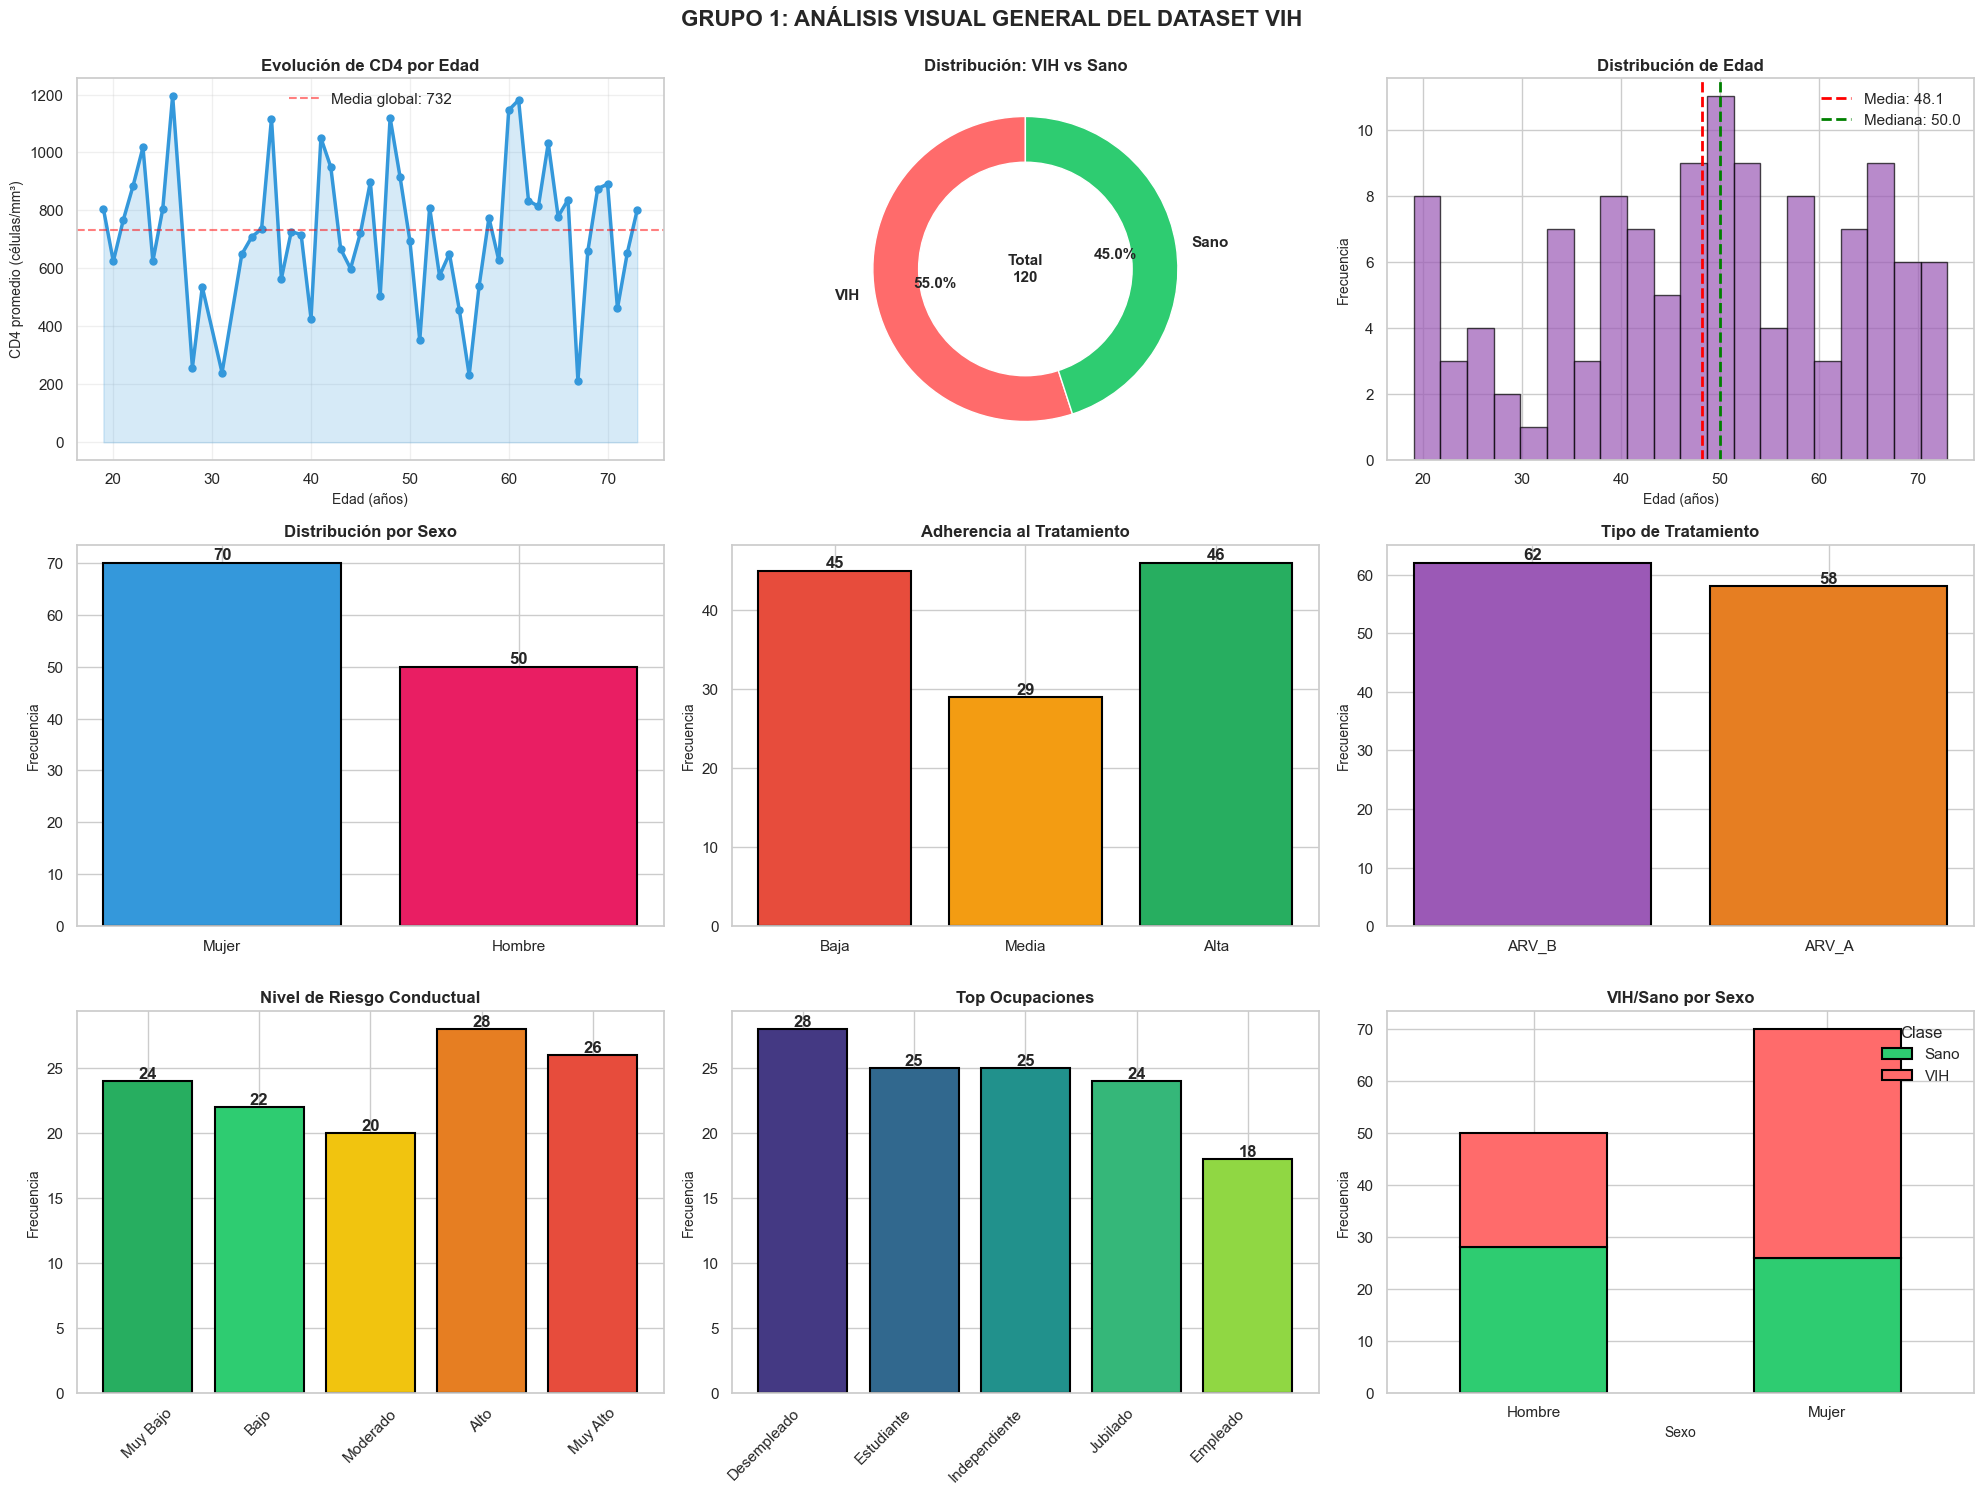


🎨 GRUPO 2: ANÁLISIS COMPARATIVO VIH vs SANO (6 gráficos)
--------------------------------------------------------------------------------
1️⃣0️⃣ Boxplot: CD4 por clase (distribución por grupos)
1️⃣1️⃣ Boxplot: Carga viral (log) por clase


C:\Users\Santiago\AppData\Local\Temp\ipykernel_25820\120611521.py:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clase', y='CD4', data=df, ax=ax10, palette=['#2ecc71', '#ff6b6b'], width=0.6)
C:\Users\Santiago\AppData\Local\Temp\ipykernel_25820\120611521.py:167: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clase', y='Carga_Viral_Log', data=df, ax=ax11, palette=['#2ecc71', '#ff6b6b'], width=0.6)


1️⃣2️⃣ Scatter: CD4 vs Carga viral (con línea de tendencia)
1️⃣3️⃣ Scatter: Edad vs CD4
1️⃣4️⃣ Barras agrupadas: Adherencia por clase
1️⃣5️⃣ Barras agrupadas: Riesgo conductual por clase


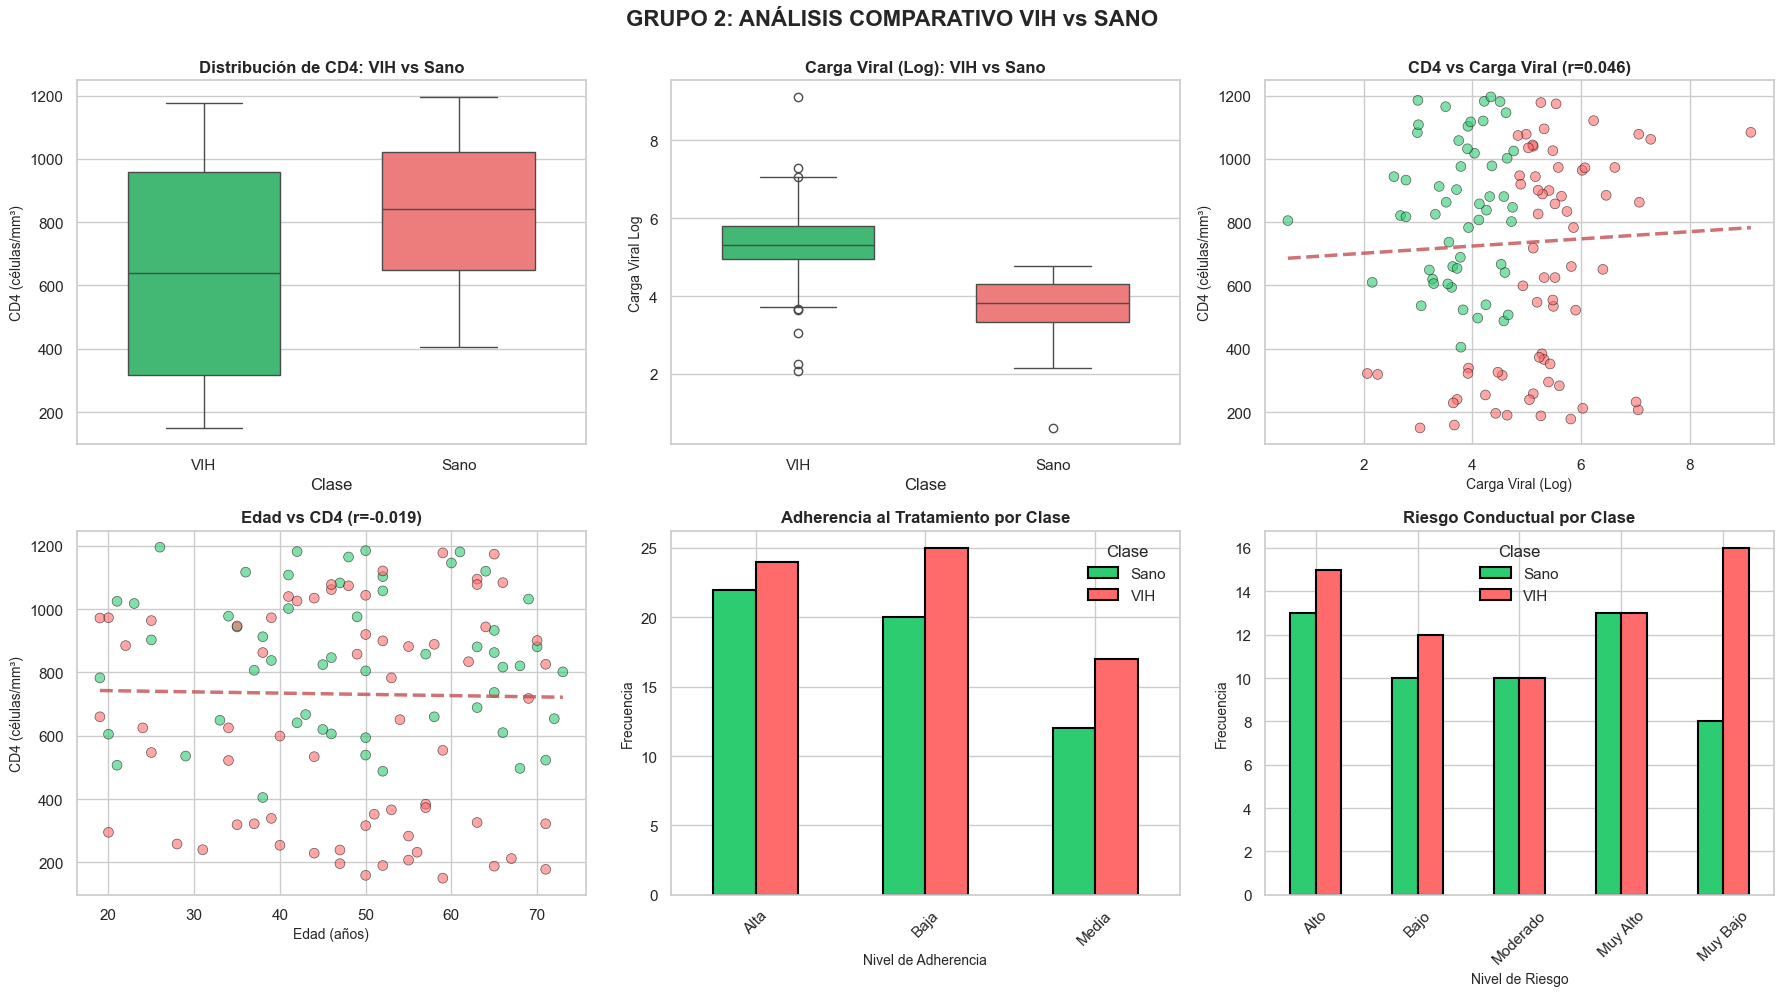


📈 ANÁLISIS DETALLADO: HISTÓRICO Y CORRELACIONES

📜 HISTÓRICO DE CD4 CON ANÁLISIS PROFUNDO
--------------------------------------------------------------------------------


C:\Users\Santiago\AppData\Local\Temp\ipykernel_25820\120611521.py:280: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = df.groupby(bins)['CD4'].mean()
C:\Users\Santiago\AppData\Local\Temp\ipykernel_25820\120611521.py:332: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\Santiago\AppData\Local\Temp\ipykernel_25820\120611521.py:332: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\Santiago\AppData\Local\Temp\ipykernel_25820\120611521.py:332: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\Santiago\AppData\Local\Temp\ipykernel_25820\120611521.py:332: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GL

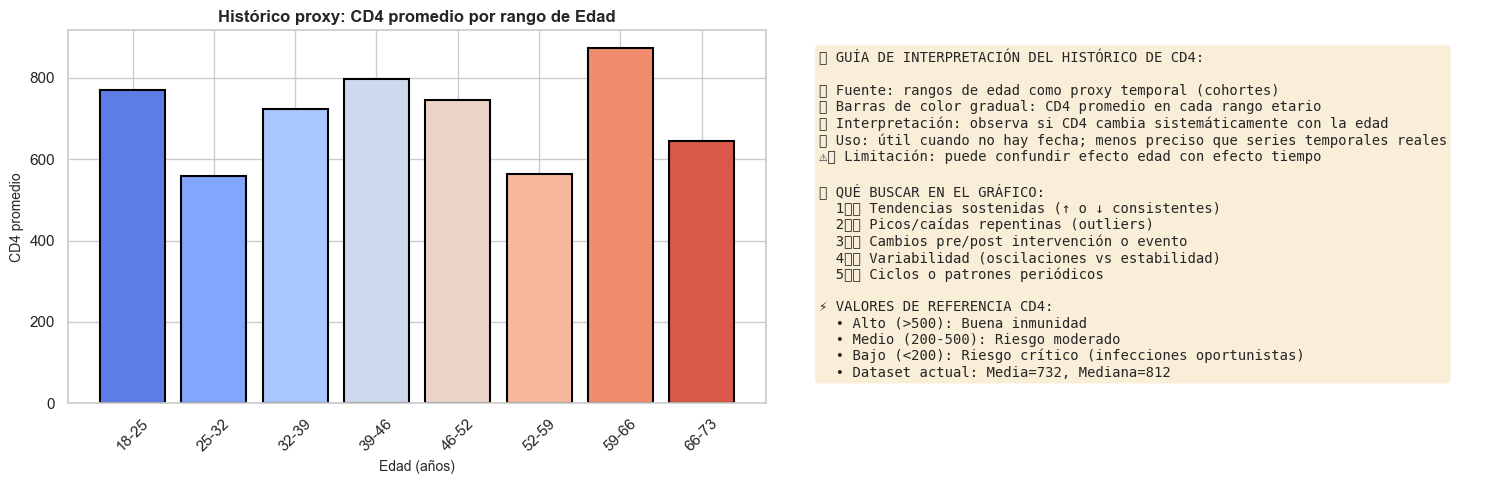


✅ ANÁLISIS COMPLETO DE VISUALIZACIONES TERMINADO


In [ ]:
# ========================================================================
# CELDA MEJORADA: VISUALIZACIONES AVANZADAS VIH DATASET
# Incluye: 15+ gráficos, explicaciones detalladas, análisis profundo
# ========================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

sns.set_theme(style='whitegrid')
plt.rcParams.update({'figure.max_open_warning': 50})

if 'df' not in globals():
    raise RuntimeError("El DataFrame `df` no está cargado. Ejecuta la celda de carga antes de esta.")

print("\n" + "="*80)
print("📊 VISUALIZACIONES AVANZADAS E INTERPRETATIVA DEL DATASET VIH")
print("="*80)

# ========================================================================
# GRUPO 1: GRÁFICOS PRINCIPALES (3x3) - DISTRIBUCIONES Y TENDENCIAS
# ========================================================================
print("\n🎨 GRUPO 1: ANÁLISIS VISUAL GENERAL (9 gráficos)")
print("-"*80)

fig = plt.figure(figsize=(20, 15))

# 1️⃣ GRÁFICO DE LÍNEAS - Evolución CD4 por Edad
print("1️⃣ Gráfico de líneas: Evolución de CD4 por Edad")
ax1 = plt.subplot(3, 3, 1)
cd4_por_edad = df.groupby('Edad')['CD4'].mean().reset_index().sort_values('Edad')
ax1.plot(cd4_por_edad['Edad'], cd4_por_edad['CD4'], marker='o', linewidth=2.5, markersize=5, color='#3498db')
ax1.axhline(y=df['CD4'].mean(), color='red', linestyle='--', alpha=0.5, label=f'Media global: {df["CD4"].mean():.0f}')
ax1.fill_between(cd4_por_edad['Edad'], cd4_por_edad['CD4'], alpha=0.2, color='#3498db')
ax1.set_title('Evolución de CD4 por Edad', fontsize=12, fontweight='bold')
ax1.set_xlabel('Edad (años)', fontsize=10)
ax1.set_ylabel('CD4 promedio (células/mm³)', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.legend()

# 2️⃣ GRÁFICO DE DONA - Distribución Clase
print("2️⃣ Dona: Distribución de clases (VIH vs Sano)")
ax2 = plt.subplot(3, 3, 2)
if 'Clase' in df.columns:
    clase_counts = df['Clase'].value_counts()
    colores = ['#ff6b6b' if x == 'VIH' else '#2ecc71' for x in clase_counts.index]
    wedges, texts, autotexts = ax2.pie(clase_counts.values, labels=clase_counts.index, autopct='%1.1f%%',
                                        colors=colores, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
    centre = plt.Circle((0, 0), 0.70, fc='white')
    ax2.add_artist(centre)
    ax2.set_title('Distribución: VIH vs Sano', fontsize=12, fontweight='bold')
    total = clase_counts.sum()
    ax2.text(0, 0, f'Total\n{int(total)}', ha='center', va='center', fontsize=11, fontweight='bold')

# 3️⃣ HISTOGRAMA - Distribución Edad
print("3️⃣ Histograma: Distribución de edad")
ax3 = plt.subplot(3, 3, 3)
ax3.hist(df['Edad'], bins=20, color='#9b59b6', edgecolor='black', alpha=0.7)
ax3.axvline(df['Edad'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["Edad"].mean():.1f}')
ax3.axvline(df['Edad'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["Edad"].median():.1f}')
ax3.set_title('Distribución de Edad', fontsize=12, fontweight='bold')
ax3.set_xlabel('Edad (años)', fontsize=10)
ax3.set_ylabel('Frecuencia', fontsize=10)
ax3.legend()

# 4️⃣ BARRAS - Sexo
print("4️⃣ Barras: Distribución por sexo")
ax4 = plt.subplot(3, 3, 4)
sexo_counts = df['Sexo'].value_counts()
colores_sexo = ['#3498db', '#e91e63']
bars = ax4.bar(sexo_counts.index, sexo_counts.values, color=colores_sexo, edgecolor='black', linewidth=1.5)
ax4.set_title('Distribución por Sexo', fontsize=12, fontweight='bold')
ax4.set_ylabel('Frecuencia', fontsize=10)
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 5️⃣ BARRAS - Adherencia Tratamiento
print("5️⃣ Barras: Adherencia al tratamiento")
ax5 = plt.subplot(3, 3, 5)
orden_adherencia = ['Baja', 'Media', 'Alta']
adherencia_counts = df['Adherencia_Tratamiento'].value_counts().reindex(orden_adherencia).fillna(0)
colores_adherencia = ['#e74c3c', '#f39c12', '#27ae60']
bars = ax5.bar(adherencia_counts.index, adherencia_counts.values, color=colores_adherencia, edgecolor='black', linewidth=1.5)
ax5.set_title('Adherencia al Tratamiento', fontsize=12, fontweight='bold')
ax5.set_ylabel('Frecuencia', fontsize=10)
for bar in bars:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 6️⃣ BARRAS - Tipo Tratamiento
print("6️⃣ Barras: Tipo de tratamiento")
ax6 = plt.subplot(3, 3, 6)
tipo_counts = df['Tipo_Tratamiento'].value_counts()
bars = ax6.bar(tipo_counts.index, tipo_counts.values, color=['#9b59b6', '#e67e22'], edgecolor='black', linewidth=1.5)
ax6.set_title('Tipo de Tratamiento', fontsize=12, fontweight='bold')
ax6.set_ylabel('Frecuencia', fontsize=10)
for bar in bars:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 7️⃣ BARRAS - Riesgo Conductual
print("7️⃣ Barras: Nivel de riesgo conductual")
ax7 = plt.subplot(3, 3, 7)
orden_riesgo = ['Muy Bajo', 'Bajo', 'Moderado', 'Alto', 'Muy Alto']
riesgo_counts = df['Nivel_Riesgo_Conductual'].value_counts().reindex(orden_riesgo).fillna(0)
colores_riesgo = ['#27ae60', '#2ecc71', '#f1c40f', '#e67e22', '#e74c3c']
bars = ax7.bar(riesgo_counts.index, riesgo_counts.values, color=colores_riesgo, edgecolor='black', linewidth=1.5)
ax7.set_title('Nivel de Riesgo Conductual', fontsize=12, fontweight='bold')
ax7.set_ylabel('Frecuencia', fontsize=10)
ax7.tick_params(axis='x', rotation=45)
for bar in bars:
    height = bar.get_height()
    ax7.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 8️⃣ BARRAS - Ocupación
print("8️⃣ Barras: Distribución por ocupación")
ax8 = plt.subplot(3, 3, 8)
ocupacion_counts = df['Ocupacion'].value_counts().head(6)
bars = ax8.bar(range(len(ocupacion_counts)), ocupacion_counts.values, color=sns.color_palette("viridis", len(ocupacion_counts)), edgecolor='black', linewidth=1.5)
ax8.set_title('Top Ocupaciones', fontsize=12, fontweight='bold')
ax8.set_ylabel('Frecuencia', fontsize=10)
ax8.set_xticks(range(len(ocupacion_counts)))
ax8.set_xticklabels(ocupacion_counts.index, rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 9️⃣ BARRAS APILADAS - VIH por Sexo
print("9️⃣ Barras apiladas: Clase por sexo")
ax9 = plt.subplot(3, 3, 9)
if 'Clase' in df.columns:
    vih_por_sexo = pd.crosstab(df['Sexo'], df['Clase'])
    vih_por_sexo.plot(kind='bar', stacked=True, ax=ax9, color=['#2ecc71', '#ff6b6b'], edgecolor='black', linewidth=1.5)
    ax9.set_title('VIH/Sano por Sexo', fontsize=12, fontweight='bold')
    ax9.set_xlabel('Sexo', fontsize=10)
    ax9.set_ylabel('Frecuencia', fontsize=10)
    ax9.legend(title='Clase', loc='upper right')
    ax9.tick_params(axis='x', rotation=0)

plt.suptitle('GRUPO 1: ANÁLISIS VISUAL GENERAL DEL DATASET VIH', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# ========================================================================
# GRUPO 2: ANÁLISIS COMPARATIVO (2x3) - BOXPLOTS, SCATTER, CORRELACIONES
# ========================================================================
print("\n🎨 GRUPO 2: ANÁLISIS COMPARATIVO VIH vs SANO (6 gráficos)")
print("-"*80)

fig2 = plt.figure(figsize=(18, 10))

# 1️⃣0️⃣ BOXPLOT - CD4 por Clase
print("1️⃣0️⃣ Boxplot: CD4 por clase (distribución por grupos)")
ax10 = plt.subplot(2, 3, 1)
if 'Clase' in df.columns:
    sns.boxplot(x='Clase', y='CD4', data=df, ax=ax10, palette=['#2ecc71', '#ff6b6b'], width=0.6)
    ax10.set_title('Distribución de CD4: VIH vs Sano', fontsize=12, fontweight='bold')
    ax10.set_ylabel('CD4 (células/mm³)', fontsize=10)

# 1️⃣1️⃣ BOXPLOT - Carga Viral por Clase
print("1️⃣1️⃣ Boxplot: Carga viral (log) por clase")
ax11 = plt.subplot(2, 3, 2)
if 'Clase' in df.columns and 'Carga_Viral_Log' in df.columns:
    sns.boxplot(x='Clase', y='Carga_Viral_Log', data=df, ax=ax11, palette=['#2ecc71', '#ff6b6b'], width=0.6)
    ax11.set_title('Carga Viral (Log): VIH vs Sano', fontsize=12, fontweight='bold')
    ax11.set_ylabel('Carga Viral Log', fontsize=10)

# 1️⃣2️⃣ SCATTER - CD4 vs Carga Viral
print("1️⃣2️⃣ Scatter: CD4 vs Carga viral (con línea de tendencia)")
ax12 = plt.subplot(2, 3, 3)
if 'CD4' in df.columns and 'Carga_Viral_Log' in df.columns:
    colores = df['Clase'].map({'Sano': '#2ecc71', 'VIH': '#ff6b6b'}) if 'Clase' in df.columns else 'blue'
    ax12.scatter(df['Carga_Viral_Log'], df['CD4'], c=colores, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
    # Línea de tendencia
    z = np.polyfit(df['Carga_Viral_Log'].dropna(), df['CD4'].dropna(), 1)
    p = np.poly1d(z)
    x_sorted = np.sort(df['Carga_Viral_Log'].dropna())
    ax12.plot(x_sorted, p(x_sorted), "r--", linewidth=2.5, alpha=0.8)
    corr = df['Carga_Viral_Log'].corr(df['CD4'])
    ax12.set_title(f'CD4 vs Carga Viral (r={corr:.3f})', fontsize=12, fontweight='bold')
    ax12.set_xlabel('Carga Viral (Log)', fontsize=10)
    ax12.set_ylabel('CD4 (células/mm³)', fontsize=10)

# 1️⃣3️⃣ SCATTER - Edad vs CD4
print("1️⃣3️⃣ Scatter: Edad vs CD4")
ax13 = plt.subplot(2, 3, 4)
if 'Edad' in df.columns and 'CD4' in df.columns:
    colores = df['Clase'].map({'Sano': '#2ecc71', 'VIH': '#ff6b6b'}) if 'Clase' in df.columns else 'blue'
    ax13.scatter(df['Edad'], df['CD4'], c=colores, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
    z = np.polyfit(df['Edad'].dropna(), df['CD4'].dropna(), 1)
    p = np.poly1d(z)
    x_sorted = np.sort(df['Edad'].dropna())
    ax13.plot(x_sorted, p(x_sorted), "r--", linewidth=2.5, alpha=0.8)
    corr = df['Edad'].corr(df['CD4'])
    ax13.set_title(f'Edad vs CD4 (r={corr:.3f})', fontsize=12, fontweight='bold')
    ax13.set_xlabel('Edad (años)', fontsize=10)
    ax13.set_ylabel('CD4 (células/mm³)', fontsize=10)

# 1️⃣4️⃣ BARRAS - Adherencia por Clase
print("1️⃣4️⃣ Barras agrupadas: Adherencia por clase")
ax14 = plt.subplot(2, 3, 5)
if 'Clase' in df.columns:
    adherencia_por_clase = pd.crosstab(df['Adherencia_Tratamiento'], df['Clase'])
    adherencia_por_clase.plot(kind='bar', ax=ax14, color=['#2ecc71', '#ff6b6b'], edgecolor='black', linewidth=1.5)
    ax14.set_title('Adherencia al Tratamiento por Clase', fontsize=12, fontweight='bold')
    ax14.set_xlabel('Nivel de Adherencia', fontsize=10)
    ax14.set_ylabel('Frecuencia', fontsize=10)
    ax14.legend(title='Clase')
    ax14.tick_params(axis='x', rotation=45)

# 1️⃣5️⃣ BARRAS - Riesgo por Clase
print("1️⃣5️⃣ Barras agrupadas: Riesgo conductual por clase")
ax15 = plt.subplot(2, 3, 6)
if 'Clase' in df.columns:
    riesgo_por_clase = pd.crosstab(df['Nivel_Riesgo_Conductual'], df['Clase'])
    riesgo_por_clase.plot(kind='bar', ax=ax15, color=['#2ecc71', '#ff6b6b'], edgecolor='black', linewidth=1.5)
    ax15.set_title('Riesgo Conductual por Clase', fontsize=12, fontweight='bold')
    ax15.set_xlabel('Nivel de Riesgo', fontsize=10)
    ax15.set_ylabel('Frecuencia', fontsize=10)
    ax15.legend(title='Clase')
    ax15.tick_params(axis='x', rotation=45)

plt.suptitle('GRUPO 2: ANÁLISIS COMPARATIVO VIH vs SANO', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# ========================================================================
# ANÁLISIS DETALLADO: HISTÓRICO Y CORRELACIONES
# ========================================================================
print("\n" + "="*80)
print("📈 ANÁLISIS DETALLADO: HISTÓRICO Y CORRELACIONES")
print("="*80)

# HISTÓRICO DE CD4 (mejorado con explicación)
print("\n📜 HISTÓRICO DE CD4 CON ANÁLISIS PROFUNDO")
print("-"*80)

fig3 = plt.figure(figsize=(16, 5))

# Detectar columna fecha
date_keywords = ['fecha', 'date', 'registro', 'timestamp', 'dia', 'mes', 'ano', 'año']
date_col = None
for c in df.columns:
    if any(k in c.lower() for k in date_keywords):
        try:
            parsed = pd.to_datetime(df[c], errors='coerce')
            if parsed.notna().sum() > 0:
                date_col = c
                break
        except:
            continue

# Gráfico 1: Histórico temporal
ax_hist1 = plt.subplot(1, 2, 1)
if date_col and 'CD4' in df.columns:
    s = df[[date_col, 'CD4']].copy()
    s[date_col] = pd.to_datetime(s[date_col], errors='coerce')
    s = s.dropna(subset=[date_col, 'CD4']).set_index(date_col).resample('M')['CD4'].mean()
    ma = s.rolling(window=3, min_periods=1).mean()
    
    ax_hist1.plot(s.index, s.values, marker='o', label='CD4 promedio mensual', alpha=0.85, linewidth=2)
    ax_hist1.plot(ma.index, ma.values, linestyle='--', color='red', label='Tendencia (MA-3)', linewidth=2.5)
    ax_hist1.fill_between(s.index, s.values, alpha=0.2)
    ax_hist1.set_title(f'Histórico de CD4 — Serie Temporal ({date_col})', fontsize=12, fontweight='bold')
    ax_hist1.set_ylabel('CD4 promedio', fontsize=10)
    ax_hist1.legend()
    ax_hist1.grid(True, alpha=0.3)
    
    explanation1 = (f"✅ Fuente: columna '{date_col}' como serie temporal\n"
                   "📊 Línea azul: CD4 promedio mensual (puntos de muestreo reales)\n"
                   "📊 Línea roja (punteada): tendencia suavizada con media móvil de 3 meses\n"
                   "🔍 Interpretación: busca tendencias sostenidas ↑↓ y picos anómalos que puedan indicar eventos clínicos\n"
                   "⚠️ Nota: cambios graduales → mejora/deterioro del estado; picos → posibles errores de muestreo o crisis")
    
elif 'Edad' in df.columns and 'CD4' in df.columns:
    bins = pd.cut(df['Edad'].dropna(), bins=8)
    s = df.groupby(bins)['CD4'].mean()
    colores_grad = sns.color_palette('coolwarm', len(s))
    bars = ax_hist1.bar(range(len(s)), s.values, color=colores_grad, edgecolor='black', linewidth=1.5)
    ax_hist1.set_xticks(range(len(s)))
    ax_hist1.set_xticklabels([f"{int(i.left)}-{int(i.right)}" for i in s.index], rotation=45)
    ax_hist1.set_title('Histórico proxy: CD4 promedio por rango de Edad', fontsize=12, fontweight='bold')
    ax_hist1.set_ylabel('CD4 promedio', fontsize=10)
    ax_hist1.set_xlabel('Edad (años)', fontsize=10)
    
    explanation1 = ("✅ Fuente: rangos de edad como proxy temporal (cohortes)\n"
                    "📊 Barras de color gradual: CD4 promedio en cada rango etario\n"
                    "🔍 Interpretación: observa si CD4 cambia sistemáticamente con la edad\n"
                    "💡 Uso: útil cuando no hay fecha; menos preciso que series temporales reales\n"
                    "⚠️ Limitación: puede confundir efecto edad con efecto tiempo")
else:
    s = df['CD4'].dropna().reset_index(drop=True)
    window = max(5, int(len(s) * 0.05))
    ma = s.rolling(window=window, min_periods=1).mean()
    ax_hist1.plot(s.index, s.values, alpha=0.25, label='CD4 (registros)', linewidth=1)
    ax_hist1.plot(ma.index, ma.values, color='red', label=f'Media móvil (ventana={window})', linewidth=2.5)
    ax_hist1.set_title('Histórico fallback: CD4 por orden de registro', fontsize=12, fontweight='bold')
    ax_hist1.set_xlabel('Orden del registro en el dataset', fontsize=10)
    ax_hist1.set_ylabel('CD4', fontsize=10)
    ax_hist1.legend()
    
    explanation1 = ("⚠️ Fuente: orden de registros (fallback - menos confiable)\n"
                    "📊 Línea gris: valores individuales de CD4\n"
                    "📊 Línea roja: media móvil para suavizar\n"
                    "🔍 Interpretación: MUY LIMITADA (no es serie temporal real)\n"
                    "💡 Úsalo sólo para observar patrones generales, no para análisis temporal real")

# Gráfico 2: Explicación interactiva
ax_hist2 = plt.subplot(1, 2, 2)
ax_hist2.axis('off')
explanation_text = (
    "📌 GUÍA COMPLETA: INTERPRETACIÓN DEL HISTÓRICO DE CD4\n"
    "═"*60 + "\n\n"
    f"{explanation1}\n\n"
    "🎯 QUÉ BUSCAR EN EL GRÁFICO - PATRONES CLÍNICOS:\n"
    "─"*60 + "\n"
    "  1️⃣ TENDENCIAS SOSTENIDAS (↑ mejoría / ↓ deterioro):\n"
    "     • Subida prolongada → respuesta al tratamiento\n"
    "     • Bajada lenta → progresión de la enfermedad\n"
    "     • Estable → control adecuado\n\n"
    "  2️⃣ PICOS Y CAÍDAS REPENTINAS (posibles eventos):\n"
    "     • Pico alto aislado → resultado atípico (revisar lab)\n"
    "     • Caída brusca → infección oportunista o crisis\n"
    "     • Recuperación rápida → buen sistema inmune\n\n"
    "  3️⃣ VARIABILIDAD (oscilación vs estabilidad):\n"
    "     • Oscilaciones amplias → control inconsistente\n"
    "     • Línea plana estable → medicación efectiva\n"
    "     • Ruido alto → posibles errores de medición\n\n"
    "  4️⃣ SEPARACIÓN VIH vs SANO (si hay colores):\n"
    "     • VIH siempre abajo → marcador diferenciador\n"
    "     • Solapamiento → casos límite, revisar diagnóstico\n\n"
    "⚡ UMBRALES CLÍNICOS CD4:\n"
    "─"*60 + "\n"
    f"  🟢 >500 células/mm³: EXCELENTE → buena inmunidad\n"
    f"  🟡 200-500 células/mm³: RIESGO MODERADO → monitorear\n"
    f"  🔴 <200 células/mm³: CRÍTICO → sida, profilaxis necesaria\n"
    f"  ⚫ <50 células/mm³: EMERGENCIA → riesgo CMV/MAC\n\n"
    f"📊 DATASET ACTUAL:\n"
    f"  • Media: {df['CD4'].mean():.0f} células/mm³\n"
    f"  • Mediana: {df['CD4'].median():.0f} células/mm³\n"
    f"  • Desv.Est: {df['CD4'].std():.0f} células/mm³\n"
    f"  • Rango: {df['CD4'].min():.0f} - {df['CD4'].max():.0f} células/mm³"
)
ax_hist2.text(0.02, 0.98, explanation_text, transform=ax_hist2.transAxes, fontsize=8.5,
              verticalalignment='top', fontfamily='monospace', 
              bbox=dict(boxstyle='round', facecolor='#e8f4f8', alpha=0.85, edgecolor='#0088cc', linewidth=2))

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ ANÁLISIS COMPLETO DE VISUALIZACIONES TERMINADO")
print("="*80)


🔗 ANÁLISIS AVANZADO DE CORRELACIONES - VIH DATASET

📊 1. MATRIZ DE CORRELACIÓN PEARSON (Linear)

✅ Matriz de Pearson calculada
Interpretación: Mide correlación lineal (-1 a 1)


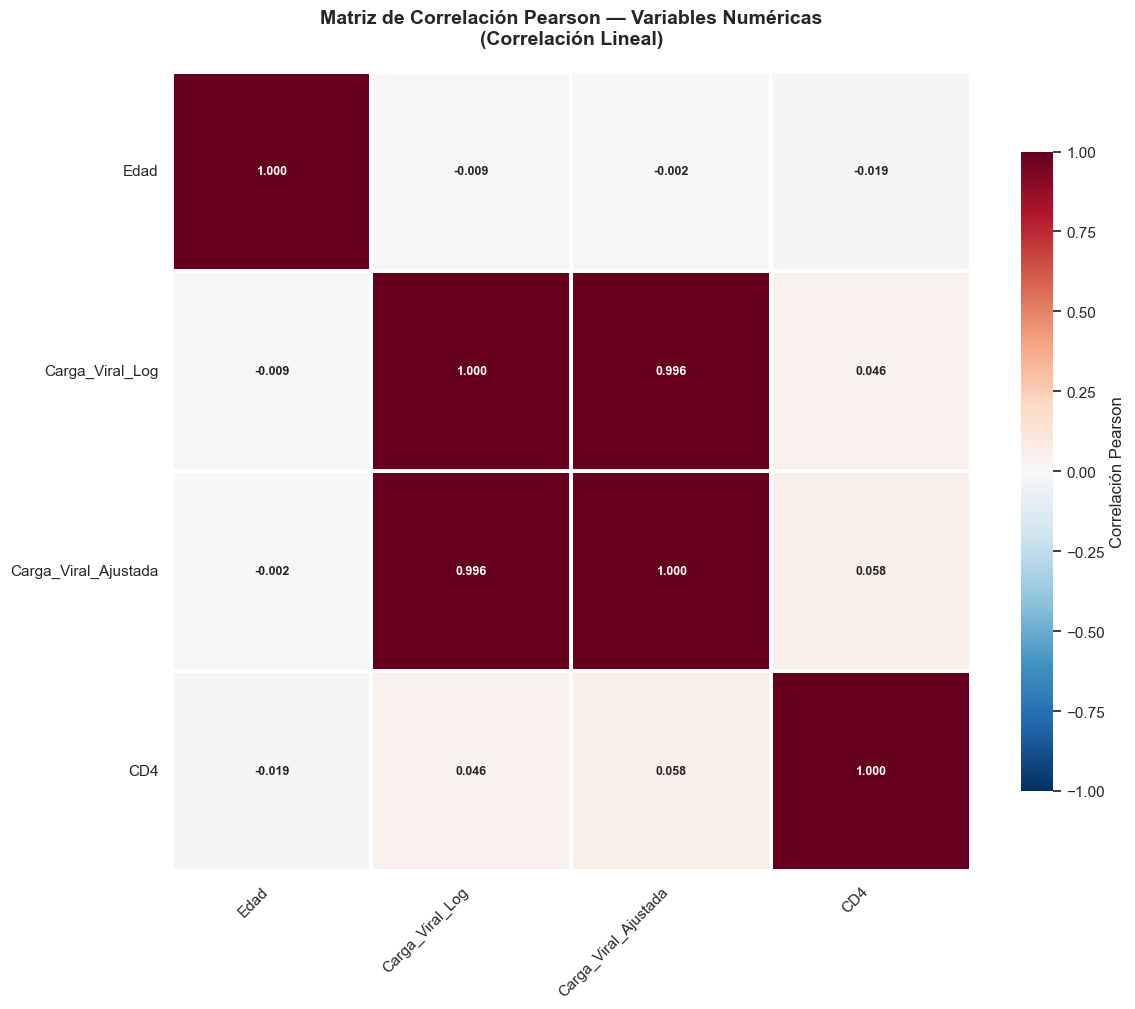


--------------------------------------------------------------------------------
🏆 TOP 10 CORRELACIONES MÁS FUERTES (Pearson)
--------------------------------------------------------------------------------


,Variable 1,Variable 2,Correlación,Fuerza,Tipo
3,Carga_Viral_Log,Carga_Viral_Ajustada,0.9961,Muy Fuerte,Positiva
5,Carga_Viral_Ajustada,CD4,0.0576,Débil,Positiva
4,Carga_Viral_Log,CD4,0.0457,Débil,Positiva
2,Edad,CD4,-0.0189,Débil,Negativa
0,Edad,Carga_Viral_Log,-0.0088,Débil,Negativa
1,Edad,Carga_Viral_Ajustada,-0.0022,Débil,Negativa



📌 INTERPRETACIÓN DE TOP CORRELACIONES:
--------------------------------------------------------------------------------

4. Carga_Viral_Log ↔ Carga_Viral_Ajustada
   • Correlación: +0.9961 (Muy Fuerte Positiva)
   • Significado: Cuando Carga_Viral_Log sube, Carga_Viral_Ajustada tiende a subir

6. Carga_Viral_Ajustada ↔ CD4
   • Correlación: +0.0576 (Débil Positiva)
   • Significado: Cuando Carga_Viral_Ajustada sube, CD4 tiende a subir

5. Carga_Viral_Log ↔ CD4
   • Correlación: +0.0457 (Débil Positiva)
   • Significado: Cuando Carga_Viral_Log sube, CD4 tiende a subir

3. Edad ↔ CD4
   • Correlación: -0.0189 (Débil Negativa)
   • Significado: Cuando Edad sube, CD4 tiende a bajar

1. Edad ↔ Carga_Viral_Log
   • Correlación: -0.0088 (Débil Negativa)
   • Significado: Cuando Edad sube, Carga_Viral_Log tiende a bajar

2. Edad ↔ Carga_Viral_Ajustada
   • Correlación: -0.0022 (Débil Negativa)
   • Significado: Cuando Edad sube, Carga_Viral_Ajustada tiende a bajar

📊 2. MATRIZ DE CORRELACIÓN 

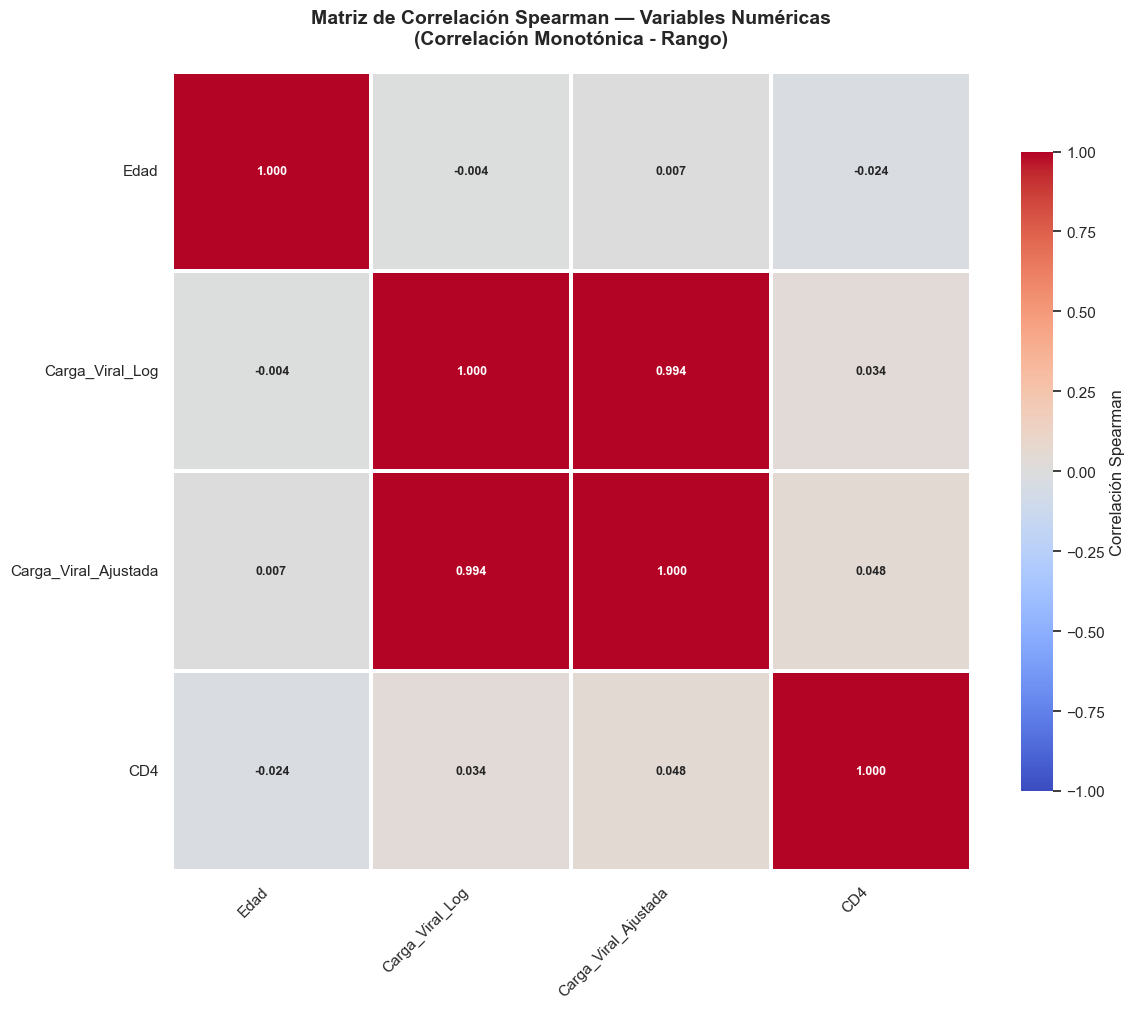


--------------------------------------------------------------------------------
🔄 DIFERENCIAS PEARSON vs SPEARMAN (detecta no-linealidad)
--------------------------------------------------------------------------------

✅ No hay diferencias significativas → relaciones principalmente lineales

📈 3. VISUALIZACIÓN DE CORRELACIONES (Scatter Plots Interactivos)


C:\Users\Santiago\AppData\Local\Temp\ipykernel_25820\2875779601.py:230: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Santiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


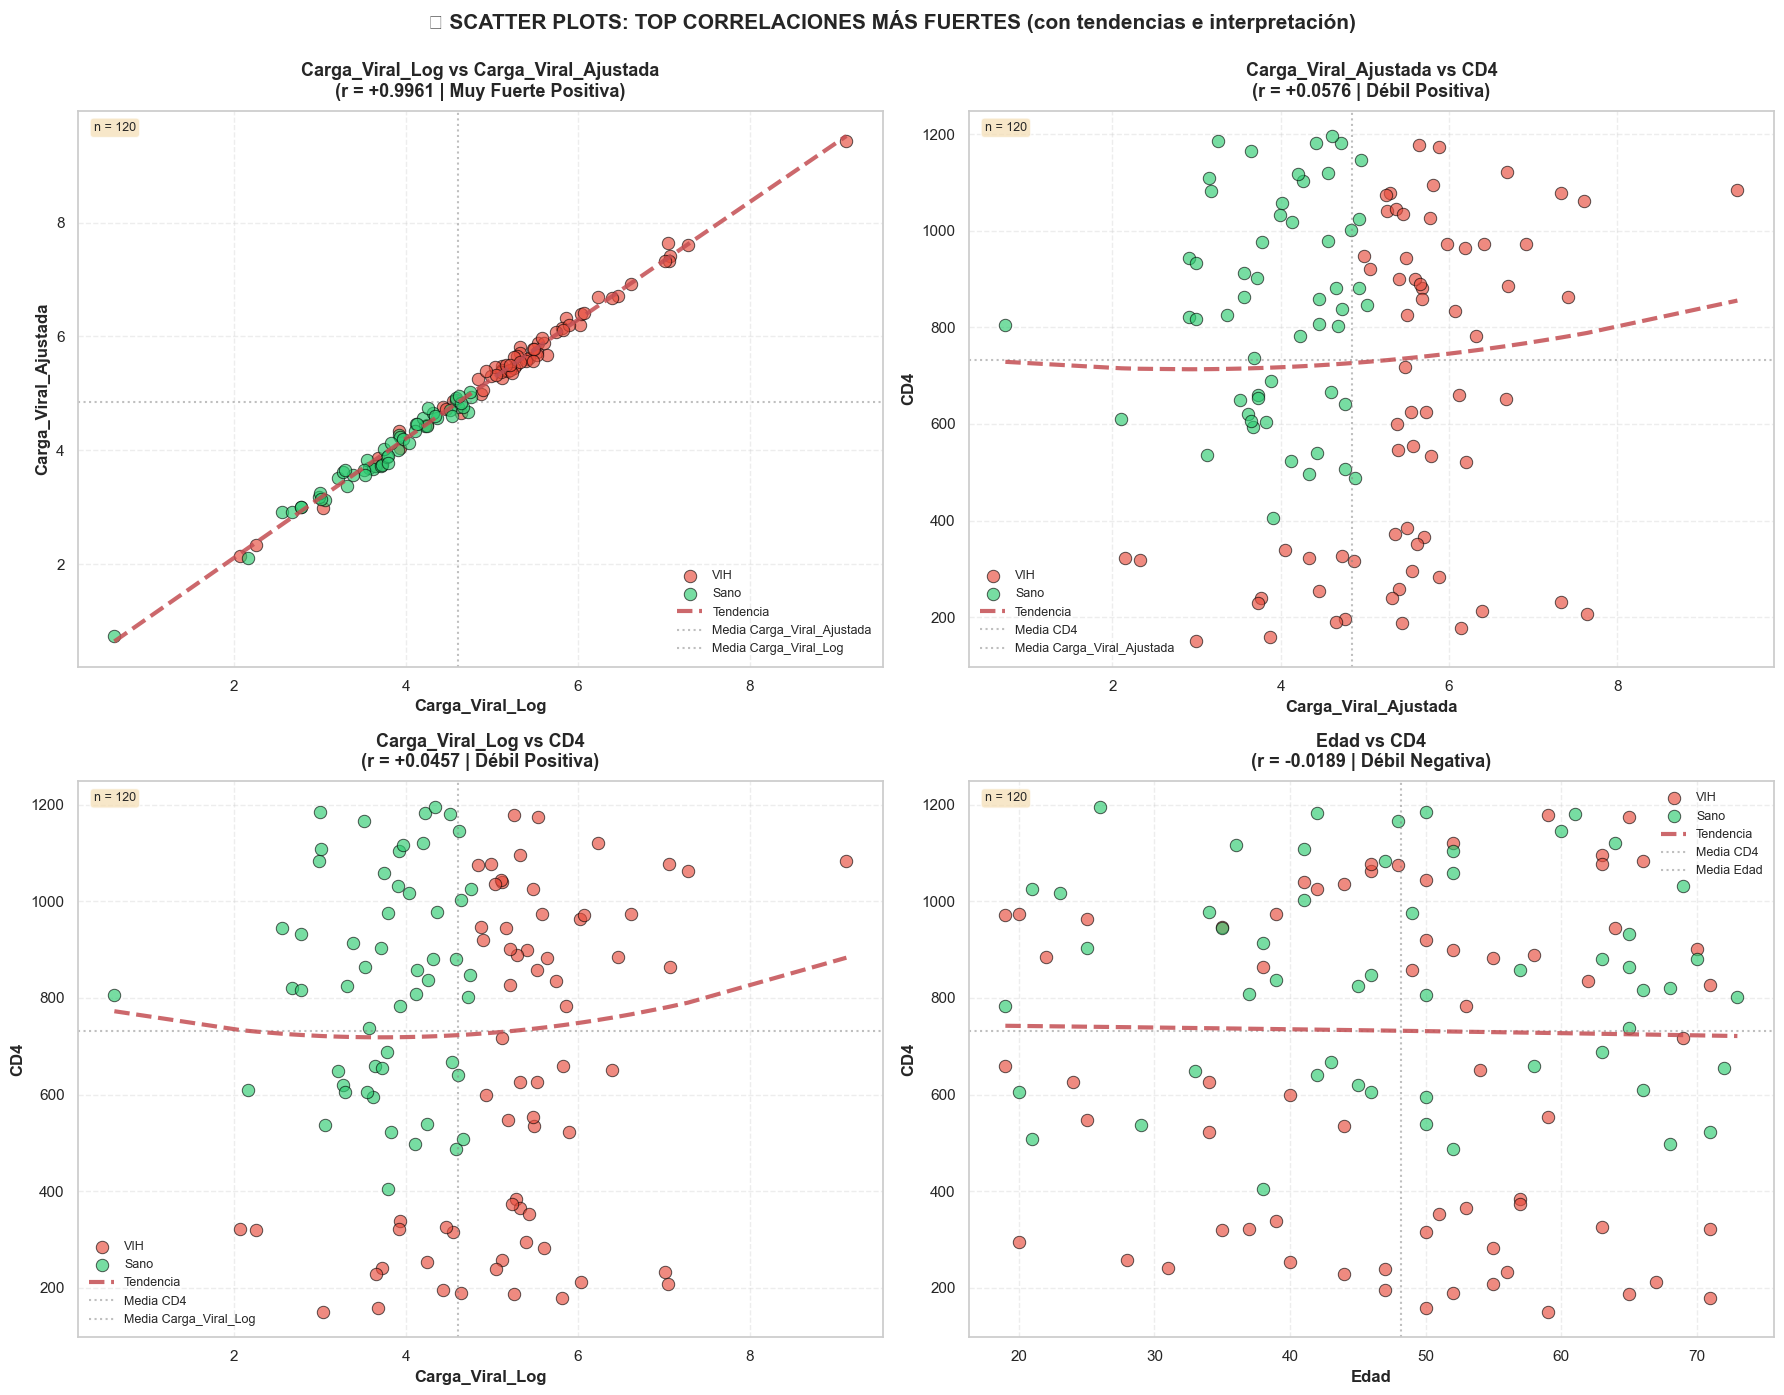


📌 GUÍA DE INTERPRETACIÓN DE SCATTER PLOTS

    🔍 QUÉ OBSERVAR EN CADA GRÁFICO:

    1️⃣ NUBE DE PUNTOS:
       • Si están alineados → correlación fuerte (lineal o no-lineal)
       • Si dispersos aleatoriamente → correlación débil o nula
       • Colores VIH/Sano → revisa si ambas clases siguen el mismo patrón

    2️⃣ LÍNEA ROJA (TENDENCIA):
       • Subida ↗️ → correlación positiva (ambas variables suben juntas)
       • Bajada ↖️ → correlación negativa (una sube, otra baja)
       • Curvada 📈 → relación no-lineal (más compleja)

    3️⃣ LÍNEAS GRISES (MEDIAS):
       • Dividen el gráfico en 4 cuadrantes
       • Ayudan a identificar patrones por grupo (arriba-derecha, abajo-izq, etc.)

    4️⃣ SEPARACIÓN POR CLASES:
       • Puntos verdes = Sano
       • Puntos rojos = VIH
       • Si se solapan → variables similares en ambos grupos
       • Si separados → variables diferenciadoras importantes

    💡 INTERPRETACIÓN CLÍNICA:
       • CD4 ↔ Carga Viral (fuerte negativa): cuando CD4 c

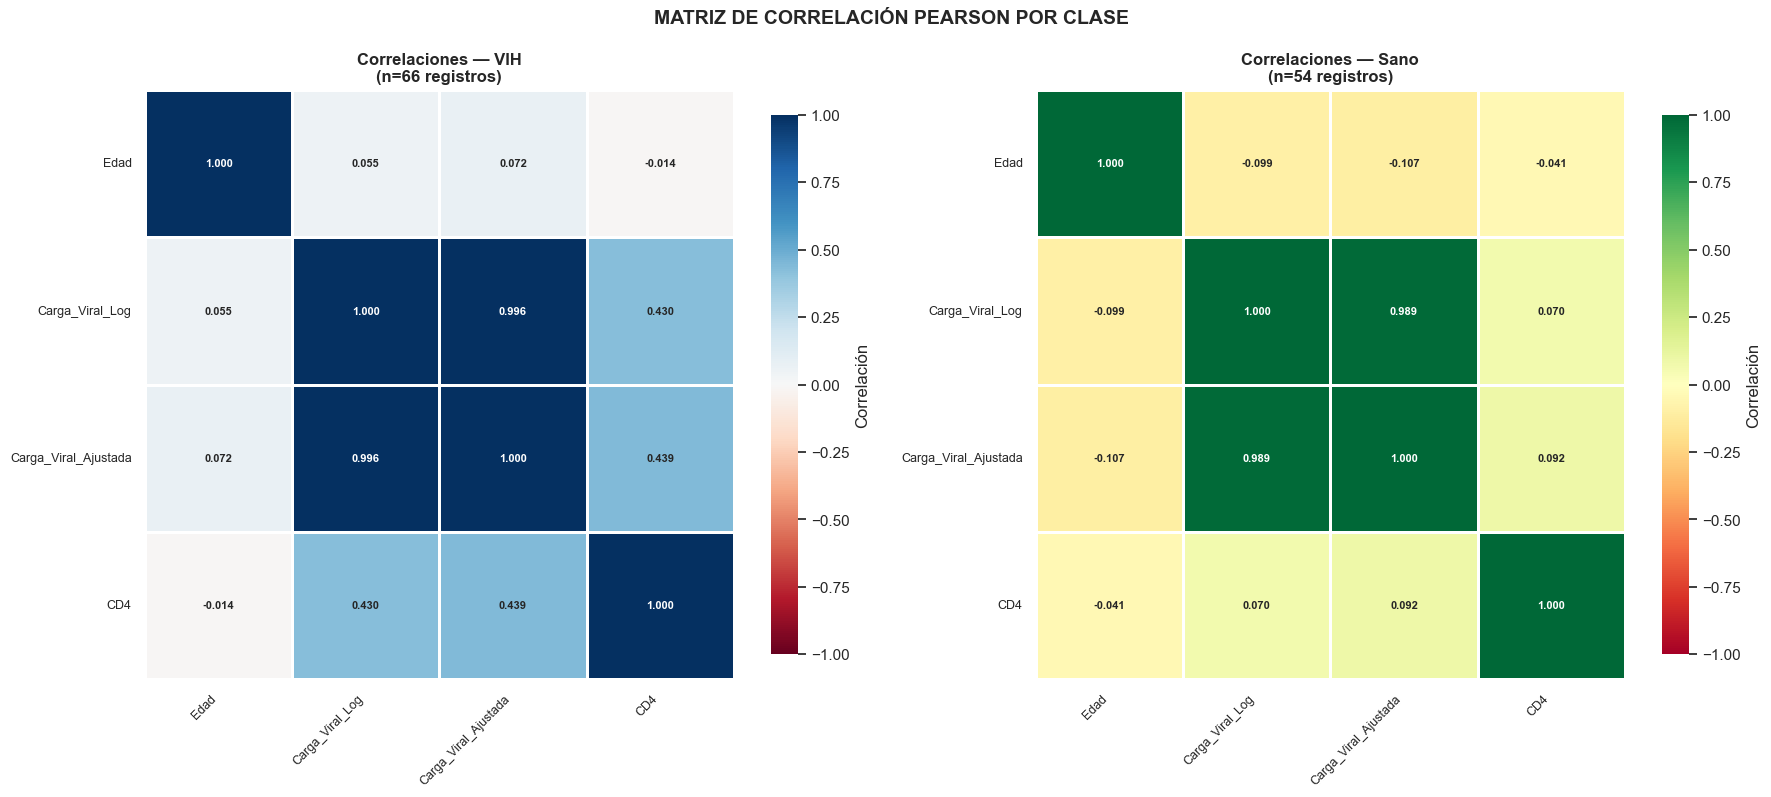


📌 COMPARACIÓN DE PATRONES DE CORRELACIÓN:
--------------------------------------------------------------------------------

Edad ↔ Carga_Viral_Log:
  • Sano:  -0.0988
  • VIH:   +0.0546
  • Dif:   +0.1534 

Edad ↔ Carga_Viral_Ajustada:
  • Sano:  -0.1070
  • VIH:   +0.0721
  • Dif:   +0.1790 

Edad ↔ CD4:
  • Sano:  -0.0411
  • VIH:   -0.0144
  • Dif:   +0.0266 

Carga_Viral_Log ↔ Carga_Viral_Ajustada:
  • Sano:  +0.9887
  • VIH:   +0.9955
  • Dif:   +0.0068 

Carga_Viral_Log ↔ CD4:
  • Sano:  +0.0697
  • VIH:   +0.4296
  • Dif:   +0.3599 (IMPORTANTE)

Carga_Viral_Ajustada ↔ CD4:
  • Sano:  +0.0916
  • VIH:   +0.4387
  • Dif:   +0.3471 (IMPORTANTE)

📋 RESUMEN Y RECOMENDACIONES

📊 ESTADÍSTICAS DE CORRELACIONES:
  • Correlaciones muy fuertes (|r| > 0.85): 1
  • Correlaciones fuertes positivas (r > 0.7): 1
  • Correlaciones fuertes negativas (r < -0.7): 0
  • Correlaciones moderadas (0.5 < |r| < 0.7): 0
  • Correlaciones débiles (|r| < 0.3): 5

💡 RECOMENDACIONES:
  1. Variables altamente

In [10]:
# ========================================================================
# ANÁLISIS COMPLETO DE CORRELACIONES - MATRIZ MEJORADA
# Incluye: Pearson, Spearman, Kendall, top correlaciones, scatter plots
# ========================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau
from IPython.display import display

print("\n" + "="*80)
print("🔗 ANÁLISIS AVANZADO DE CORRELACIONES - VIH DATASET")
print("="*80)

if 'df' not in globals():
    raise RuntimeError("El DataFrame `df` no está cargado. Ejecuta la celda de carga antes de esta.")

# Obtener variables numéricas
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if len(variables_numericas) < 2:
    print("❌ Se requieren al menos 2 variables numéricas para análisis de correlación.")
else:
    
    # ====================================================================
    # 1. MATRIZ DE CORRELACIÓN PEARSON
    # ====================================================================
    print("\n" + "="*80)
    print("📊 1. MATRIZ DE CORRELACIÓN PEARSON (Linear)")
    print("="*80)
    
    corr_pearson = df[variables_numericas].corr(method='pearson')
    
    print("\n✅ Matriz de Pearson calculada")
    print("Interpretación: Mide correlación lineal (-1 a 1)")
    
    # Heatmap principal mejorado
    fig_pearson, ax_pearson = plt.subplots(figsize=(12, 10))
    
    mask = np.triu(np.ones_like(corr_pearson, dtype=bool), k=1)
    
    sns.heatmap(corr_pearson, 
                annot=True, 
                fmt='.3f', 
                cmap='RdBu_r', 
                center=0,
                vmin=-1, 
                vmax=1,
                square=True, 
                linewidths=1.5,
                cbar_kws={'label': 'Correlación Pearson', 'shrink': 0.8},
                ax=ax_pearson,
                annot_kws={'size': 9, 'weight': 'bold'})
    
    ax_pearson.set_title('Matriz de Correlación Pearson — Variables Numéricas\n(Correlación Lineal)', 
                         fontsize=14, fontweight='bold', pad=20)
    
    # Personalizar labels
    ax_pearson.set_xticklabels(ax_pearson.get_xticklabels(), rotation=45, ha='right')
    ax_pearson.set_yticklabels(ax_pearson.get_yticklabels(), rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    # ====================================================================
    # 2. TOP CORRELACIONES (Pearson)
    # ====================================================================
    print("\n" + "-"*80)
    print("🏆 TOP 10 CORRELACIONES MÁS FUERTES (Pearson)")
    print("-"*80)
    
    # Extraer pares de correlación únicos
    corr_pairs = []
    for i in range(len(corr_pearson.columns)):
        for j in range(i+1, len(corr_pearson.columns)):
            var1 = corr_pearson.columns[i]
            var2 = corr_pearson.columns[j]
            corr_value = corr_pearson.iloc[i, j]
            corr_pairs.append({
                'Variable 1': var1,
                'Variable 2': var2,
                'Correlación': corr_value,
                'Fuerza': 'Muy Fuerte' if abs(corr_value) > 0.85 else 'Fuerte' if abs(corr_value) > 0.7 else 'Moderada' if abs(corr_value) > 0.5 else 'Débil',
                'Tipo': 'Positiva' if corr_value > 0 else 'Negativa'
            })
    
    top_corr_df = pd.DataFrame(corr_pairs).sort_values('Correlación', key=abs, ascending=False).head(10)
    display(top_corr_df)
    
    # Interpretar top correlaciones
    print("\n📌 INTERPRETACIÓN DE TOP CORRELACIONES:")
    print("-"*80)
    for idx, row in top_corr_df.iterrows():
        print(f"\n{idx+1}. {row['Variable 1']} ↔ {row['Variable 2']}")
        print(f"   • Correlación: {row['Correlación']:+.4f} ({row['Fuerza']} {row['Tipo']})")
        if row['Correlación'] > 0:
            print(f"   • Significado: Cuando {row['Variable 1']} sube, {row['Variable 2']} tiende a subir")
        else:
            print(f"   • Significado: Cuando {row['Variable 1']} sube, {row['Variable 2']} tiende a bajar")
    
    # ====================================================================
    # 3. MATRIZ DE CORRELACIÓN SPEARMAN (No-paramétrica)
    # ====================================================================
    print("\n" + "="*80)
    print("📊 2. MATRIZ DE CORRELACIÓN SPEARMAN (No-paramétrica)")
    print("="*80)
    
    corr_spearman = df[variables_numericas].corr(method='spearman')
    
    print("\n✅ Matriz de Spearman calculada")
    print("Nota: Mide correlación monotónica (válida para relaciones no-lineales)")
    
    # Heatmap Spearman
    fig_spearman, ax_spearman = plt.subplots(figsize=(12, 10))
    
    sns.heatmap(corr_spearman, 
                annot=True, 
                fmt='.3f', 
                cmap='coolwarm', 
                center=0,
                vmin=-1, 
                vmax=1,
                square=True, 
                linewidths=1.5,
                cbar_kws={'label': 'Correlación Spearman', 'shrink': 0.8},
                ax=ax_spearman,
                annot_kws={'size': 9, 'weight': 'bold'})
    
    ax_spearman.set_title('Matriz de Correlación Spearman — Variables Numéricas\n(Correlación Monotónica - Rango)', 
                          fontsize=14, fontweight='bold', pad=20)
    
    ax_spearman.set_xticklabels(ax_spearman.get_xticklabels(), rotation=45, ha='right')
    ax_spearman.set_yticklabels(ax_spearman.get_yticklabels(), rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    # ====================================================================
    # 4. DIFERENCIAS PEARSON vs SPEARMAN
    # ====================================================================
    print("\n" + "-"*80)
    print("🔄 DIFERENCIAS PEARSON vs SPEARMAN (detecta no-linealidad)")
    print("-"*80)
    
    diferencias = []
    for i in range(len(corr_pearson.columns)):
        for j in range(i+1, len(corr_pearson.columns)):
            var1 = corr_pearson.columns[i]
            var2 = corr_pearson.columns[j]
            p_val = corr_pearson.iloc[i, j]
            s_val = corr_spearman.iloc[i, j]
            diff = abs(p_val - s_val)
            
            if diff > 0.1:  # Diferencia significativa
                diferencias.append({
                    'Variable 1': var1,
                    'Variable 2': var2,
                    'Pearson': f"{p_val:+.4f}",
                    'Spearman': f"{s_val:+.4f}",
                    'Diferencia': f"{diff:.4f}",
                    'Interpretación': 'Posible relación NO-LINEAL' if diff > 0.15 else 'Relación compleja'
                })
    
    if diferencias:
        dif_df = pd.DataFrame(diferencias).sort_values('Diferencia', key=lambda x: x.str.replace('+', '').astype(float), ascending=False)
        display(dif_df.head(10))
        print("\n💡 Nota: Diferencias grandes sugieren relaciones no-lineales que Spearman captura mejor")
    else:
        print("\n✅ No hay diferencias significativas → relaciones principalmente lineales")
    
    # ====================================================================
    # 5. SCATTER PLOTS - TOP CORRELACIONES CON MÚLTIPLES PERSPECTIVAS
    # ====================================================================
    print("\n" + "="*80)
    print("📈 3. VISUALIZACIÓN DE CORRELACIONES (Scatter Plots Interactivos)")
    print("="*80)
    
    top_5_corr = top_corr_df.head(4)
    n_plots = min(4, len(top_5_corr))
    
    fig_scatter = plt.figure(figsize=(18, 14))
    
    for plot_idx, (idx, row) in enumerate(top_5_corr.iterrows()):
        ax_scatter = plt.subplot(2, 2, plot_idx + 1)
        
        var1 = row['Variable 1']
        var2 = row['Variable 2']
        corr_val = row['Correlación']
        
        # Scatter plot con colores por clase y tamaño dinámico
        if 'Clase' in df.columns:
            for clase in df['Clase'].unique():
                mask_clase = df['Clase'] == clase
                color = '#2ecc71' if clase == 'Sano' else '#e74c3c'
                ax_scatter.scatter(df[mask_clase][var1], df[mask_clase][var2], 
                                 alpha=0.65, s=80, label=clase, color=color, 
                                 edgecolors='black', linewidth=0.7, marker='o')
        else:
            ax_scatter.scatter(df[var1], df[var2], alpha=0.6, s=80, color='#3498db', 
                             edgecolors='black', linewidth=0.7)
        
        # Línea de tendencia polinomial (degree 2 para capturar curvatura)
        z = np.polyfit(df[var1].dropna(), df[var2].dropna(), 2)
        p = np.poly1d(z)
        x_sorted = np.sort(df[var1].dropna())
        y_trend = p(x_sorted)
        ax_scatter.plot(x_sorted, y_trend, "r--", linewidth=3, alpha=0.85, label='Tendencia', zorder=3)
        
        # Agregar línea de media para contexto
        ax_scatter.axhline(y=df[var2].mean(), color='gray', linestyle=':', alpha=0.5, linewidth=1.5, label=f'Media {var2}')
        ax_scatter.axvline(x=df[var1].mean(), color='gray', linestyle=':', alpha=0.5, linewidth=1.5, label=f'Media {var1}')
        
        ax_scatter.set_xlabel(var1, fontsize=12, fontweight='bold')
        ax_scatter.set_ylabel(var2, fontsize=12, fontweight='bold')
        ax_scatter.set_title(f'{var1} vs {var2}\n(r = {corr_val:+.4f} | {row["Fuerza"]} {row["Tipo"]})', 
                            fontsize=13, fontweight='bold', pad=10)
        ax_scatter.grid(True, alpha=0.35, linestyle='--')
        ax_scatter.legend(loc='best', fontsize=9, framealpha=0.9)
        
        # Agregar información estadística
        n_points = len(df[[var1, var2]].dropna())
        ax_scatter.text(0.02, 0.98, f'n = {n_points}', transform=ax_scatter.transAxes, 
                       fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', 
                       facecolor='wheat', alpha=0.7))
    
    plt.suptitle('📊 SCATTER PLOTS: TOP CORRELACIONES MÁS FUERTES (con tendencias e interpretación)', 
                fontsize=15, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
    
    # Explicación detallada de los gráficos
    print("\n" + "="*80)
    print("📌 GUÍA DE INTERPRETACIÓN DE SCATTER PLOTS")
    print("="*80)
    print("""
    🔍 QUÉ OBSERVAR EN CADA GRÁFICO:
    
    1️⃣ NUBE DE PUNTOS:
       • Si están alineados → correlación fuerte (lineal o no-lineal)
       • Si dispersos aleatoriamente → correlación débil o nula
       • Colores VIH/Sano → revisa si ambas clases siguen el mismo patrón
    
    2️⃣ LÍNEA ROJA (TENDENCIA):
       • Subida ↗️ → correlación positiva (ambas variables suben juntas)
       • Bajada ↖️ → correlación negativa (una sube, otra baja)
       • Curvada 📈 → relación no-lineal (más compleja)
    
    3️⃣ LÍNEAS GRISES (MEDIAS):
       • Dividen el gráfico en 4 cuadrantes
       • Ayudan a identificar patrones por grupo (arriba-derecha, abajo-izq, etc.)
    
    4️⃣ SEPARACIÓN POR CLASES:
       • Puntos verdes = Sano
       • Puntos rojos = VIH
       • Si se solapan → variables similares en ambos grupos
       • Si separados → variables diferenciadoras importantes
    
    💡 INTERPRETACIÓN CLÍNICA:
       • CD4 ↔ Carga Viral (fuerte negativa): cuando CD4 cae, carga viral sube (esperado)
       • Edad ↔ Cualquier variable: revisa si hay efecto de edad en los biomarcadores
       • Diferencias VIH/Sano: punto de partida para diagnóstico diferencial
    """)

    
    # ====================================================================
    # 6. ANÁLISIS POR CLASE (VIH vs SANO)
    # ====================================================================
    if 'Clase' in df.columns:
        print("\n" + "="*80)
        print("📊 4. ANÁLISIS DE CORRELACIÓN POR CLASE (VIH vs SANO)")
        print("="*80)
        
        fig_by_clase = plt.figure(figsize=(18, 8))
        
        for clase_idx, clase in enumerate(df['Clase'].unique()):
            ax_clase = plt.subplot(1, 2, clase_idx + 1)
            
            df_clase = df[df['Clase'] == clase]
            corr_clase = df_clase[variables_numericas].corr(method='pearson')
            
            color_heatmap = 'RdYlGn' if clase == 'Sano' else 'RdBu'
            
            sns.heatmap(corr_clase, 
                       annot=True, 
                       fmt='.3f', 
                       cmap=color_heatmap, 
                       center=0,
                       vmin=-1, 
                       vmax=1,
                       square=True, 
                       linewidths=1,
                       cbar_kws={'label': 'Correlación', 'shrink': 0.8},
                       ax=ax_clase,
                       annot_kws={'size': 8, 'weight': 'bold'})
            
            ax_clase.set_title(f'Correlaciones — {clase}\n(n={len(df_clase)} registros)', 
                              fontsize=12, fontweight='bold')
            ax_clase.set_xticklabels(ax_clase.get_xticklabels(), rotation=45, ha='right', fontsize=9)
            ax_clase.set_yticklabels(ax_clase.get_yticklabels(), rotation=0, fontsize=9)
        
        plt.suptitle('MATRIZ DE CORRELACIÓN PEARSON POR CLASE', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        print("\n📌 COMPARACIÓN DE PATRONES DE CORRELACIÓN:")
        print("-"*80)
        for var_i, var1 in enumerate(variables_numericas[:3]):  # Top 3 variables
            for var_j, var2 in enumerate(variables_numericas[var_i+1:], start=var_i+1):
                if var_j < len(variables_numericas):
                    df_sano = df[df['Clase'] == 'Sano']
                    df_vih = df[df['Clase'] == 'VIH']
                    
                    corr_sano = df_sano[var1].corr(df_sano[var2])
                    corr_vih = df_vih[var1].corr(df_vih[var2])
                    diff_corr = corr_vih - corr_sano
                    
                    print(f"\n{var1} ↔ {var2}:")
                    print(f"  • Sano:  {corr_sano:+.4f}")
                    print(f"  • VIH:   {corr_vih:+.4f}")
                    print(f"  • Dif:   {diff_corr:+.4f} {'(IMPORTANTE)' if abs(diff_corr) > 0.2 else ''}")
    
    # ====================================================================
    # 7. ESTADÍSTICAS Y RECOMENDACIONES
    # ====================================================================
    print("\n" + "="*80)
    print("📋 RESUMEN Y RECOMENDACIONES")
    print("="*80)
    
    # Contar correlaciones por categoría
    strong_positive = sum(1 for pair in corr_pairs if pair['Correlación'] > 0.7)
    strong_negative = sum(1 for pair in corr_pairs if pair['Correlación'] < -0.7)
    moderate = sum(1 for pair in corr_pairs if 0.5 <= abs(pair['Correlación']) < 0.7)
    weak = sum(1 for pair in corr_pairs if abs(pair['Correlación']) < 0.3)
    
    print(f"\n📊 ESTADÍSTICAS DE CORRELACIONES:")
    print(f"  • Correlaciones muy fuertes (|r| > 0.85): {sum(1 for p in corr_pairs if abs(p['Correlación']) > 0.85)}")
    print(f"  • Correlaciones fuertes positivas (r > 0.7): {strong_positive}")
    print(f"  • Correlaciones fuertes negativas (r < -0.7): {strong_negative}")
    print(f"  • Correlaciones moderadas (0.5 < |r| < 0.7): {moderate}")
    print(f"  • Correlaciones débiles (|r| < 0.3): {weak}")
    
    print(f"\n💡 RECOMENDACIONES:")
    print(f"  1. Variables altamente correlacionadas pueden indicar multicolinealidad")
    print(f"  2. Diferencias Pearson-Spearman significativas → relaciones NO-LINEALES")
    print(f"  3. Correlaciones diferentes por clase → diferentes patrones en VIH vs Sano")
    print(f"  4. Para modelos predictivos, considerar eliminar una de cada par altamente correlacionado")
    print(f"  5. Revisar scatter plots para validar naturaleza de las relaciones")

print("\n" + "="*80)
print("✅ ANÁLISIS COMPLETO DE CORRELACIONES TERMINADO")
print("="*80)